# Time Series Preprocessing Benchmark

**Table of contents**<a id='toc0_'></a>    
- [Data Collection](#toc1_1_)    
      - [Small task: Process dataframe structure](#toc1_1_1_1_)    
- [Feature Engineering](#toc2_)    
    - [Technical Analysis](#toc2_1_1_)    
      - [RSI Index](#toc2_1_1_1_)    
      - [MACD Index](#toc2_1_1_2_)    
      - [MFI Index](#toc2_1_1_3_)    
      - [Stochastic Oscillator](#toc2_1_1_4_)    
    - [Plot the NFLX Price values over time](#toc2_1_2_)    
    - [Other related features](#toc2_1_3_)    
      - [If the dividends/ split data is not available in the set, we can approximate Adjusted Closing Price to be close to Close Price](#toc2_1_3_1_)    
      - [Log Return calculated using Adjusted Close Price](#toc2_1_3_2_)    
      - [Realized Volatility](#toc2_1_3_3_)    
      - [Some Time features like year, Month, weekday](#toc2_1_3_4_)    
  - [Clean and Preprocessing](#toc2_2_)    
    - [Check for stationarity of Close price](#toc2_2_1_)    
      - [Pre-requisites:](#toc2_2_1_1_)    
      - [Augmented Dickey-Fuller Test (ADF test):](#toc2_2_1_2_)    
      - [Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS):](#toc2_2_1_3_)    
      - [Ljung-Box Test](#toc2_2_1_4_)    
      - [ARCH test](#toc2_2_1_5_)    
    - [Other methods](#toc2_2_2_)    
      - [Box-Cox Transform](#toc2_2_2_1_)    
      - [Yeo/Johnson Transform](#toc2_2_2_2_)    
      - [Also try naive Standard Scaling](#toc2_2_2_3_)    
    - [Denoising](#toc2_2_3_)    
      - [Moving Average (MA) or Smoothing Kernel](#toc2_2_3_1_)    
      - [Seasonal-Time decomposition with LOESS (STL)](#toc2_2_3_2_)    
      - [Hodrick-Prescott Filter (HP Filter)](#toc2_2_3_3_)    
      - [Savitzky - Golay Filter (SG Filter)](#toc2_2_3_4_)    
        - [Pre-requisites: W-S interpolation, the Runge's phenomenon](#toc2_2_3_4_1_)    
      - [Kalman Filters](#toc2_2_3_5_)    
    - [Different Denoising domain techniques](#toc2_2_4_)    
      - [Fourier Transform](#toc2_2_4_1_)    
        - [Pre-requisites: Some similarity between Dot Products and Inner Product](#toc2_2_4_1_1_)    
        - [A bit about Complex Number](#toc2_2_4_1_2_)    
        - [Deep Intuition of the Formulas](#toc2_2_4_1_3_)    
      - [Other Fourier variant: Short-Time Fourier Transform (STFT)](#toc2_2_4_2_)    
      - [Wavelet shrinkage](#toc2_2_4_3_)    
        - [Pre-requisites: Wavelet and Wavelet Transform](#toc2_2_4_3_1_)    
        - [The Wavelet Transformation in pywt](#toc2_2_4_3_2_)    
        - [Scalogram](#toc2_2_4_3_3_)    
        - [Global Spectrum](#toc2_2_4_3_4_)    
      - [Hilbert-Huang Transform (HHT)](#toc2_2_4_4_)    
        - [Pre-requisites: Cubic Spline Interpolation](#toc2_2_4_4_1_)    
        - [The Empirical Mode Decompostion (EMD)](#toc2_2_4_4_2_)    
      - [Other variants of EMD](#toc2_2_4_5_)    
        - [EEMD](#toc2_2_4_5_1_)    
        - [CEEMD/ CEEMDAN](#toc2_2_4_5_2_)    
        - [VMD](#toc2_2_4_5_3_)    
        - [MEMD](#toc2_2_4_5_4_)    
        - [NA-MEMD](#toc2_2_4_5_5_)    
        - [ICEEMDAN](#toc2_2_4_5_6_)    
        - [Pre-requisites: Hilbert Transform](#toc2_2_4_5_7_)    
        - [Pre-requisites: Cauchy Principle Value](#toc2_2_4_5_8_)    
        - [Hilbert Spectrum Analysis (HSA)](#toc2_2_4_5_9_)    
      - [Sample comprehensive implementation and comparison between methods](#toc2_2_4_6_)    
      - [Additional: How to evaluate the smoothing technique](#toc2_2_4_7_)    
        - [Mean Squared Error (MSE)](#toc2_2_4_7_1_)    
        - [Mean Absolute Error (MAE)](#toc2_2_4_7_2_)    
        - [Smoothness Metrics (Variance of the First Difference)](#toc2_2_4_7_3_)    
        - [Signal-to-Noise Ratio (SNR)](#toc2_2_4_7_4_)    
    - [Dealing with Nulls and Missing data](#toc2_2_5_)    
      - [Forward/ Back fills => LOCF/ NOCB](#toc2_2_5_1_)    
      - [Interpolation](#toc2_2_5_2_)    
    - [Outlier Detection](#toc2_2_6_)    
      - [Hampel filter](#toc2_2_6_1_)    
      - [Winsorization](#toc2_2_6_2_)    
      - [Z-score/ Modified Z-Score](#toc2_2_6_3_)    
      - [Grubbs' test](#toc2_2_6_4_)    
      - [Dixon's Q test](#toc2_2_6_5_)    
      - [Boxplot/ Tukey's fences](#toc2_2_6_6_)    
      - [Cumulative Sum Control Chart (CUSUM)](#toc2_2_6_7_)    
      - [Singular Spectrum Analysis (SSA) outlier detection](#toc2_2_6_8_)    
      - [Change Point Detection](#toc2_2_6_9_)    
        - [Bayesian Change Point Detection](#toc2_2_6_9_1_)    
        - [Pruned Exact Linear Time (PELT)](#toc2_2_6_9_2_)    
        - [Kernel Change Point algorithm](#toc2_2_6_9_3_)    
        - [Dynamic Programming CPD](#toc2_2_6_9_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [16]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#setup system path for modular import
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

#Processing and tests
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

#Fetching stock data with the given name
import yfinance as yf

#For fetching data from Wikipedia
from bs4 import BeautifulSoup
import requests
from io import StringIO

#for technical analysis
import ta
import mplfinance as mpf
import plotly.graph_objects as go

#Time series decomposition and forecasting prep
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf, pacf, kpss

#Stationarity test
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

#Smoothing
from scipy.ndimage import gaussian_filter1d
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.filters.hp_filter import hpfilter
from scipy.signal import savgol_filter
import pywt # wavelet transform
from scipy.signal import stft #short time fourier transform, default frourier transform is already in numpy
from PyEMD.EMD import EMD #EMD

# Additional
from scipy.signal import hilbert

#Evaluation 
from sklearn.metrics import mean_squared_error, mean_absolute_error

## <a id='toc1_1_'></a>[Data Collection](#toc0_)

In [4]:
def get_sp100_constituents():
    url = "https://en.wikipedia.org/wiki/S%26P_100"
    headers = {"User-Agent": "Mozilla/5.0"}
    
    html = requests.get(url, headers=headers).text
    
    # Wrap in StringIO to silence the warning
    tables = pd.read_html(StringIO(html))
    
    sp100 = [t for t in tables if t.shape[0] > 50 and t.shape[1] >= 3][0]
    sp100.columns = ["Symbol", "Name", "Sector"]
    
    return sp100


sp100 = get_sp100_constituents()
sp100 = sp100[sp100['Symbol'] != 'PLTR']

sp100.to_csv('D:/Study/Education/Projects/OmniTS/data/stock_information.csv')

In [ ]:
# get tickers from your sp100 dataframe
tickers = sp100["Symbol"].tolist()

# fetch 10 years of daily data
data = yf.download(
    tickers,
    start="2013-01-01",
    end="2023-12-31",
    interval="1d",
    group_by="ticker",
    auto_adjust=True,   # adjust for splits/dividends
    threads=True
)

[**********************99%***********************]  99 of 100 completed

In [14]:
df = pd.read_csv('D:/Study/Education/Projects/OmniTS/data/raw_price_sp100.csv', index_col = 0)

In [15]:
df.head()

,Date,NFLX_ Open,NFLX_ High,NFLX_ Low,NFLX_ Close,NFLX_ Volume,LIN_ Open,LIN_ High,LIN_ Low,LIN_ Close,...,CVX_ Open,CVX_ High,CVX_ Low,CVX_ Close,CVX_ Volume,AVGO_ Open,AVGO_ High,AVGO_ Low,AVGO_ Close,AVGO_ Volume
0,2013-01-02,13.601429,13.687143,12.955714,13.144286,19431300,87.786133,89.083855,87.754481,89.083855,...,65.003707,65.092132,64.101779,65.074448,6144100,NaN,NaN,NaN,NaN,NaN
1,2013-01-03,13.138571,13.988571,13.075714,13.798571,27912500,89.162983,89.780191,88.735683,89.083855,...,64.927099,65.386905,64.555718,64.797409,6817000,NaN,NaN,NaN,NaN,NaN
2,2013-01-04,13.791429,13.958571,13.648571,13.711429,17761100,89.352847,90.001707,89.194590,89.685188,...,64.838661,65.210046,64.785608,65.139305,4414500,NaN,NaN,NaN,NaN,NaN
3,2013-01-07,13.770000,14.535714,13.731429,14.171429,45550400,89.170853,89.685189,88.917640,89.487366,...,64.856344,64.897608,64.367065,64.697182,4861000,NaN,NaN,NaN,NaN,NaN
4,2013-01-08,14.287143,14.427143,13.828571,13.880000,24714900,89.511132,90.144163,89.075918,90.112511,...,64.538023,64.661816,64.314011,64.408333,6325400,NaN,NaN,NaN,NaN,NaN


The data is organized in multiIndex hierarchical column name, so we need to find a way to break down/ flatten into single index and also bring the Date from index to actual column

#### <a id='toc1_1_1_1_'></a>[Small task: Process dataframe structure](#toc0_)

Approach 1

In [ ]:
df = pd.DataFrame(data.to_records())

df.head()

,Date,"('NFLX', 'Open')","('NFLX', 'High')","('NFLX', 'Low')","('NFLX', 'Close')","('NFLX', 'Volume')","('LIN', 'Open')","('LIN', 'High')","('LIN', 'Low')","('LIN', 'Close')",...,"('CVX', 'Open')","('CVX', 'High')","('CVX', 'Low')","('CVX', 'Close')","('CVX', 'Volume')","('AVGO', 'Open')","('AVGO', 'High')","('AVGO', 'Low')","('AVGO', 'Close')","('AVGO', 'Volume')"
0,2013-01-02,13.601429,13.687143,12.955714,13.144286,19431300,87.786133,89.083855,87.754481,89.083855,...,65.003707,65.092132,64.101779,65.074448,6144100,NaN,NaN,NaN,NaN,NaN
1,2013-01-03,13.138571,13.988571,13.075714,13.798571,27912500,89.162983,89.780191,88.735683,89.083855,...,64.927099,65.386905,64.555718,64.797409,6817000,NaN,NaN,NaN,NaN,NaN
2,2013-01-04,13.791429,13.958571,13.648571,13.711429,17761100,89.352847,90.001707,89.194590,89.685188,...,64.838661,65.210046,64.785608,65.139305,4414500,NaN,NaN,NaN,NaN,NaN
3,2013-01-07,13.770000,14.535714,13.731429,14.171429,45550400,89.170853,89.685189,88.917640,89.487366,...,64.856344,64.897608,64.367065,64.697182,4861000,NaN,NaN,NaN,NaN,NaN
4,2013-01-08,14.287143,14.427143,13.828571,13.880000,24714900,89.511132,90.144163,89.075918,90.112511,...,64.538023,64.661816,64.314011,64.408333,6325400,NaN,NaN,NaN,NaN,NaN


Approach 2

In [ ]:
data_flat = data.copy()
data_flat.columns = data.columns.to_flat_index()

In [ ]:
df.head()

,Date,NFLX_ Open,NFLX_ High,NFLX_ Low,NFLX_ Close,NFLX_ Volume,LIN_ Open,LIN_ High,LIN_ Low,LIN_ Close,...,CVX_ Open,CVX_ High,CVX_ Low,CVX_ Close,CVX_ Volume,AVGO_ Open,AVGO_ High,AVGO_ Low,AVGO_ Close,AVGO_ Volume
0,2013-01-02,13.601429,13.687143,12.955714,13.144286,19431300,87.786133,89.083855,87.754481,89.083855,...,65.003707,65.092132,64.101779,65.074448,6144100,NaN,NaN,NaN,NaN,NaN
1,2013-01-03,13.138571,13.988571,13.075714,13.798571,27912500,89.162983,89.780191,88.735683,89.083855,...,64.927099,65.386905,64.555718,64.797409,6817000,NaN,NaN,NaN,NaN,NaN
2,2013-01-04,13.791429,13.958571,13.648571,13.711429,17761100,89.352847,90.001707,89.194590,89.685188,...,64.838661,65.210046,64.785608,65.139305,4414500,NaN,NaN,NaN,NaN,NaN
3,2013-01-07,13.770000,14.535714,13.731429,14.171429,45550400,89.170853,89.685189,88.917640,89.487366,...,64.856344,64.897608,64.367065,64.697182,4861000,NaN,NaN,NaN,NaN,NaN
4,2013-01-08,14.287143,14.427143,13.828571,13.880000,24714900,89.511132,90.144163,89.075918,90.112511,...,64.538023,64.661816,64.314011,64.408333,6325400,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df.to_csv('D:/Study/Education/Projects/OmniTS/data/raw_price_sp100.csv')

In [20]:
df_NFLX = df[['Date', 'NFLX_Open', 'NFLX_High', 'NFLX_Low', 'NFLX_Close', 'NFLX_Volume']]

In [ ]:
df_NFLX

,Date,NFLX_Open,NFLX_High,NFLX_Low,NFLX_Close,NFLX_Volume
0,2013-01-02,13.601429,13.687143,12.955714,13.144286,19431300
1,2013-01-03,13.138571,13.988571,13.075714,13.798571,27912500
2,2013-01-04,13.791429,13.958571,13.648571,13.711429,17761100
3,2013-01-07,13.770000,14.535714,13.731429,14.171429,45550400
4,2013-01-08,14.287143,14.427143,13.828571,13.880000,24714900
...,...,...,...,...,...,...
2763,2023-12-22,494.000000,496.019989,485.450012,486.760010,2702700
2764,2023-12-26,489.390015,491.480011,486.380005,491.190002,2034500
2765,2023-12-27,491.239990,494.019989,489.250000,491.790009,2561300
2766,2023-12-28,492.000000,492.890015,489.070007,490.510010,1710500


# <a id='toc2_'></a>[Feature Engineering](#toc0_)

### <a id='toc2_1_1_'></a>[Technical Analysis](#toc0_)

In [21]:
df_NFLX['Date'] = pd.to_datetime(df_NFLX['Date'])

C:\Users\admin\AppData\Local\Temp\ipykernel_23428\683461793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NFLX['Date'] = pd.to_datetime(df_NFLX['Date'])


#### <a id='toc2_1_1_1_'></a>[RSI Index](#toc0_)

In [ ]:
def calculate_rsi_wilder(series: pd.Series, period: int = 14) -> pd.Series:
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    # Wilder's smoothing is basically EMA with alpha = 1/period
    avg_gain = gain.ewm(alpha=1/period, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/period, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_NFLX['RSI_14'] = calculate_rsi_wilder(df_NFLX['close'], period=14)

In [ ]:
df_NFLX["RSI"] = ta.momentum.RSIIndicator(df_NFLX["NFLX_Close"], window=14).rsi()

#### <a id='toc2_1_1_2_'></a>[MACD Index](#toc0_)

In [ ]:
def EMA(series: pd.Series, period: int = 12) -> pd.Series:
    ema = series.ewm(span=period, adjust=False).mean()
    ema.iloc[:period-1] = np.nan  # mask first values
    return ema

df_NFLX['EMA_12'] = EMA(df_NFLX['NFLX_Close'], period=12)
df_NFLX['EMA_26'] = EMA(df_NFLX['NFLX_Close'], period=26)
df_NFLX['MACD'] = df_NFLX['EMA_12'] - df_NFLX['EMA_26']
df_NFLX['Signal_Line'] = EMA(df_NFLX['MACD'], period=9)

#### <a id='toc2_1_1_3_'></a>[MFI Index](#toc0_)

In [ ]:
df_NFLX['TP'] = (df_NFLX['NFLX_High'] + df_NFLX['NFLX_Low'] + df_NFLX['NFLX_Close']) / 3

df_NFLX['MF'] = df_NFLX['TP'] * df_NFLX['NFLX_Volume']

df_NFLX['PMF'] = np.where(df_NFLX['TP'] > df_NFLX['TP'].shift(1), df_NFLX['MF'], 0)
df_NFLX['NMF'] = np.where(df_NFLX['TP'] < df_NFLX['TP'].shift(1), df_NFLX['MF'], 0)

df_NFLX['PMF_sum'] = df_NFLX['PMF'].rolling(window=14).sum()
df_NFLX['NMF_sum'] = df_NFLX['NMF'].rolling(window=14).sum()  

df_NFLX['MR'] = df_NFLX['PMF_sum'] / df_NFLX['NMF_sum']
df_NFLX['MFI'] = 100 - (100 / (1 + df_NFLX['MR']))

In [26]:
df_NFLX.columns = df_NFLX.columns.str.replace('NFLX_', '')

#### <a id='toc2_1_1_4_'></a>[Stochastic Oscillator](#toc0_)

In [ ]:
def stochastic_oscillator(df, k_period=14, d_period=3):
    # Highest high & lowest low over the lookback window
    low_min = df['Low'].rolling(window=k_period).min()
    high_max = df['High'].rolling(window=k_period).max()
    
    # %K line
    k_percent = 100 * (df['Close'] - low_min) / (high_max - low_min)
    
    # %D line (moving average of %K)
    d_percent = k_percent.rolling(window=d_period).mean()
    
    return k_percent, d_percent

df_NFLX['%K'], df_NFLX['%D'] = stochastic_oscillator(df_NFLX, k_period=14, d_period=3)

In [28]:
df_NFLX.head()

,Date,Open,High,Low,Close,Volume,RSI,EMA_12,EMA_26,MACD,...,TP,MF,PMF,NMF,PMF_sum,NMF_sum,MR,MFI,%K,%D
0,2013-01-02,13.601429,13.687143,12.955714,13.144286,19431300,NaN,NaN,NaN,NaN,...,13.262381,2.577053e+08,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-03,13.138571,13.988571,13.075714,13.798571,27912500,NaN,NaN,NaN,NaN,...,13.620952,3.801948e+08,3.801948e+08,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-04,13.791429,13.958571,13.648571,13.711429,17761100,NaN,NaN,NaN,NaN,...,13.772857,2.446211e+08,2.446211e+08,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-07,13.770000,14.535714,13.731429,14.171429,45550400,NaN,NaN,NaN,NaN,...,14.146191,6.443646e+08,6.443646e+08,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-08,14.287143,14.427143,13.828571,13.880000,24714900,NaN,NaN,NaN,NaN,...,14.045238,3.471267e+08,0.000000e+00,3.471267e+08,NaN,NaN,NaN,NaN,NaN,NaN


### <a id='toc2_1_2_'></a>[Plot the NFLX Price values over time](#toc0_)

d:\Study\Setup\anaconda\config\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


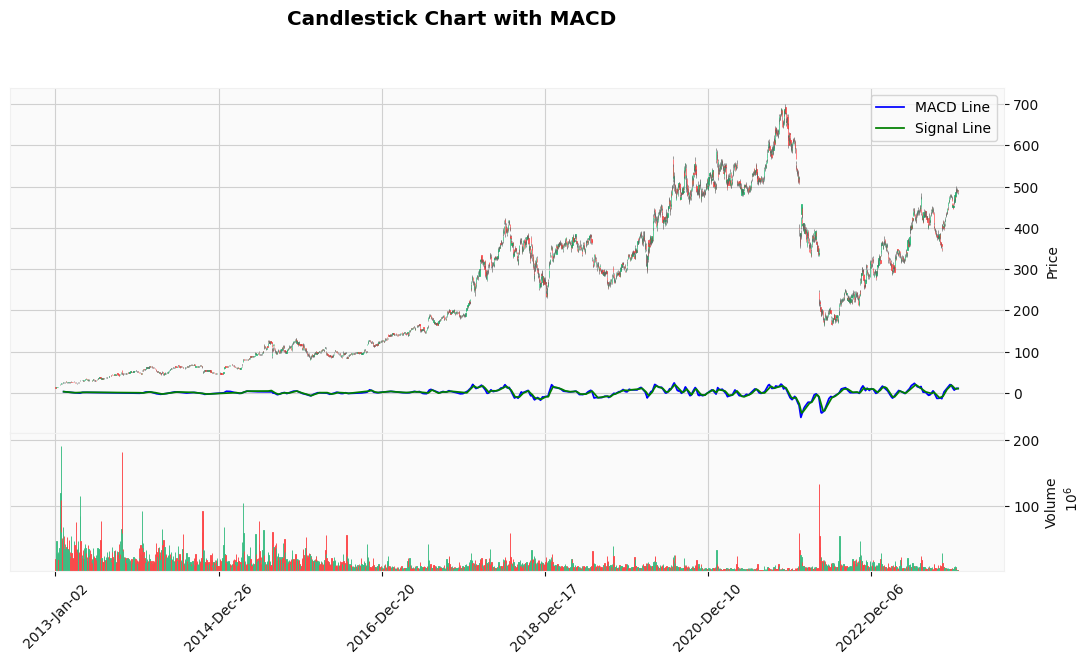

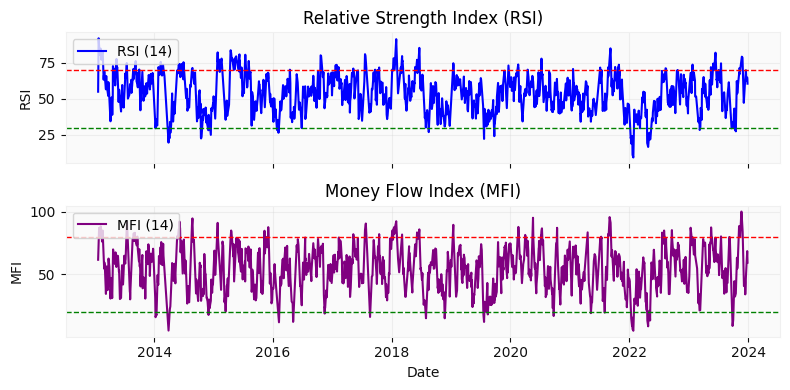

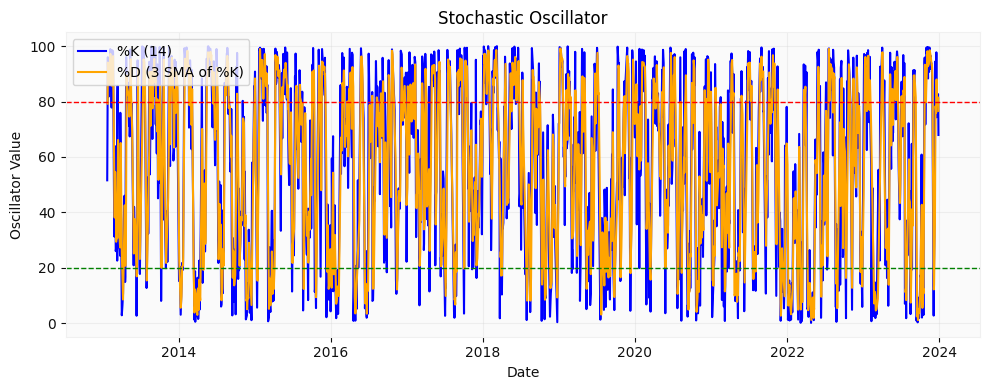

In [ ]:
df_NFLX.index = df_NFLX['Date']

## 1. For the MACD and Signal Line on the candlestick chart
apds = [
    mpf.make_addplot(df_NFLX['MACD'], color='blue', label='MACD Line'),
    mpf.make_addplot(df_NFLX['Signal_Line'], color='green', label='Signal Line')
]

## 2. Plot candlestick chart with volume
mpf.plot(
    df_NFLX,
    type='candle',
    style='yahoo',
    volume=True,
    addplot=apds,
    title="Candlestick Chart with MACD",
    ylabel="Price",
    ylabel_lower="Volume",
    figratio=(8,4),
    figscale=1.2
)

## 3. Plot RSI and MFI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,4), sharex=True)

ax1.plot(df_NFLX['Date'], df_NFLX['RSI'], label='RSI (14)', color='blue')
ax1.axhline(70, color='red', linestyle='--', linewidth=1)   # overbought
ax1.axhline(30, color='green', linestyle='--', linewidth=1) # oversold
ax1.set_title("Relative Strength Index (RSI)")
ax1.set_ylabel("RSI")
ax1.legend(loc="upper left")
ax1.grid(True, alpha=0.3)

ax2.plot(df_NFLX['Date'], df_NFLX['MFI'], label='MFI (14)', color='purple')
ax2.axhline(80, color='red', linestyle='--', linewidth=1)   # overbought
ax2.axhline(20, color='green', linestyle='--', linewidth=1) # oversold
ax2.set_title("Money Flow Index (MFI)")
ax2.set_ylabel("MFI")
ax2.legend(loc="upper left")
ax2.grid(True, alpha=0.3)

# Shared x-axis (Date)
plt.xlabel("Date")
plt.tight_layout()
plt.show()

## 4. Plot Stochastic Oscillator
plt.figure(figsize=(10,4))

plt.plot(df_NFLX['Date'], df_NFLX['%K'], label='%K (14)', color='blue')
plt.plot(df_NFLX['Date'], df_NFLX['%D'], label='%D (3 SMA of %K)', color='orange')

# Overbought / Oversold lines
plt.axhline(80, color='red', linestyle='--', linewidth=1)
plt.axhline(20, color='green', linestyle='--', linewidth=1)

plt.title("Stochastic Oscillator")
plt.ylabel("Oscillator Value")
plt.xlabel("Date")
plt.legend(loc="upper left")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### <a id='toc2_1_3_'></a>[Other related features](#toc0_)

#### <a id='toc2_1_3_1_'></a>[If the dividends/ split data is not available in the set, we can approximate Adjusted Closing Price to be close to Close Price](#toc0_)

In [ ]:
df_NFLX['Adjusted_Close_Price'] = df_NFLX['Close']

#### <a id='toc2_1_3_2_'></a>[Log Return calculated using Adjusted Close Price](#toc0_)

$$rt​=ln(Pt−1​Pt​​)$$

In [ ]:
df_NFLX["LogRet"] = np.log(df_NFLX["Adjusted_Close_Price"] / df_NFLX["Adjusted_Close_Price"].shift(1))

#### <a id='toc2_1_3_3_'></a>[Realized Volatility](#toc0_)

- Mainly requires Intradays (multiple row per 1 day meaning different prices based on hour bars with frequency 1-min, 5-min, 15-min)

then RV can be calculated by

$$
RV_t = \sqrt{\sum_{i=1}^{M} r_{t,i}^2}
​$$

where $r_{t,i}$ = intraday log return

However, since these are day-by-day market we don't have intradays so we can use these formulas instead

* Parkinson volatility (use High-Low)

$$σ^2 = \frac{1}{4 \ln(2)} \left( \ln \left( \frac{High}{Low} \right) \right)^2$$

* Rogers–Satchell Volatility

$$σ^2 = \ln \left( \frac{High}{Close} \right) \ln \left( \frac{High}{Open} \right) 
+ \ln \left( \frac{Low}{Close} \right) \ln \left( \frac{Low}{Open} \right)$$

In [ ]:
# Parkinson volatility
df_NFLX["ParkinsonVol"] = (1 / (4*np.log(2))) * (np.log(df_NFLX["High"] / df_NFLX["Low"]))**2

# Rogers-Satchell volatility
df_NFLX["RSVol"] = (np.log(df_NFLX["High"]/df_NFLX["Close"]) * np.log(df_NFLX["High"]/df_NFLX["Open"]) +
               np.log(df_NFLX["Low"]/df_NFLX["Close"]) * np.log(df_NFLX["Low"]/df_NFLX["Open"]))


#### <a id='toc2_1_3_4_'></a>[Some Time features like year, Month, weekday](#toc0_)

In [ ]:
df_NFLX['Year'] = df_NFLX['Date'].dt.year
df_NFLX['Month'] = df_NFLX['Date'].dt.month
df_NFLX['Weekday'] = df_NFLX['Date'].dt.weekday

In [ ]:
df_NFLX.head()

,Date,Open,High,Low,Close,Volume,RSI,EMA_12,EMA_26,MACD,...,MFI,%K,%D,Adjusted_Close_Price,LogRet,ParkinsonVol,RSVol,Year,Month,Weekday
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,2013-01-02,13.601429,13.687143,12.955714,13.144286,19431300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.144286,NaN,0.001088,0.000957,2013,1,2
2013-01-03,2013-01-03,13.138571,13.988571,13.075714,13.798571,27912500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.798571,0.048578,0.001643,0.001115,2013,1,3
2013-01-04,2013-01-04,13.791429,13.958571,13.648571,13.711429,17761100,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.711429,-0.006335,0.000182,0.000263,2013,1,4
2013-01-07,2013-01-07,13.770000,14.535714,13.731429,14.171429,45550400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.171429,0.032998,0.001169,0.001462,2013,1,0
2013-01-08,2013-01-08,14.287143,14.427143,13.828571,13.880000,24714900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.880000,-0.020779,0.000648,0.000498,2013,1,1


In [ ]:
df_NFLX.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'EMA_12',
       'EMA_26', 'MACD', 'Signal_Line', 'TP', 'MF', 'PMF', 'NMF', 'PMF_sum',
       'NMF_sum', 'MR', 'MFI', '%K', '%D', 'Adjusted_Close_Price', 'LogRet',
       'ParkinsonVol', 'RSVol', 'Year', 'Month', 'Weekday'],
      dtype='object')

## <a id='toc2_2_'></a>[Clean and Preprocessing](#toc0_)

### <a id='toc2_2_1_'></a>[Check for stationarity of Close price](#toc0_)

In [ ]:
df_NFLX['Close_log'] = np.log(df_NFLX['Close'])

In [41]:
### Test for differencing of non-seasonal patterns

def find_d(dataset, col): 
    i = 0
    temp = dataset
    while True:
        result = adfuller(temp[col].dropna())
        if result[1] < 0.05:
            print(f"Number of difference: {i}")
            print('ADF Statistic: %f' % result[0])
            print('p-value: %f' % result[1])
            break
        else:
            temp = temp.diff().dropna()
            i = i+1
            
            if temp[col].isna().all():  # Prevent infinite loop
                print("All values became NaN after differencing. Check data.")
                break
            
find_d(df_NFLX, 'Close')

Number of difference: 1
ADF Statistic: -11.096320
p-value: 0.000000


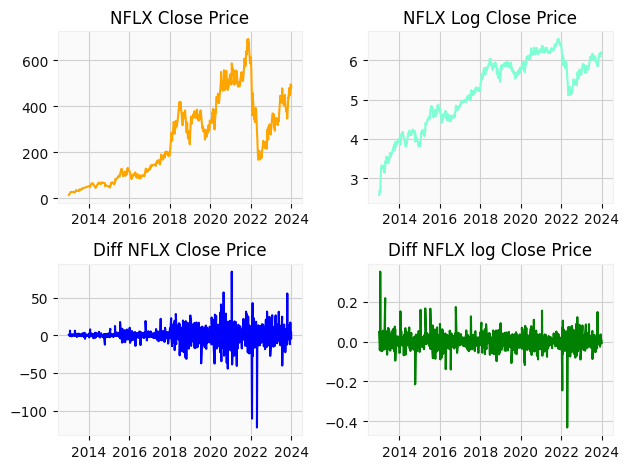

In [ ]:
plt.subplot(2,2,1)
plt.plot(df_NFLX['Date'], df_NFLX['Close'], label='Close_Price', color='orange')
plt.title('NFLX Close Price')

plt.subplot(2,2,2)
plt.plot(df_NFLX['Date'], df_NFLX['Close_log'], label='Close_Price', color='aquamarine')
plt.title('NFLX Log Close Price')

plt.subplot(2,2,3)
plt.plot(df_NFLX['Date'], df_NFLX['Close'] - df_NFLX['Close'].shift(1), label='Close_Price', color='blue')
plt.title('Diff NFLX Close Price')

plt.subplot(2,2,4)
plt.plot(df_NFLX['Date'], df_NFLX['Close_log'] - df_NFLX['Close_log'].shift(1), label='Close_Price', color='green')
plt.title('Diff NFLX log Close Price')

plt.tight_layout()
plt.show()

For raw close price, the original series is not stationary, so we need to take the first differentiation to ensure the stationarity of the data. However, when we first take the log of the price the series itself is stationary and doesn't need another step of differencing to get the P< 0.05 in adf

We still need to apply several tests to see which processing method is more appropriate, here we apply a wider variety of test on the logging of raw series to see whether log is an appropriate approach

#### <a id='toc2_2_1_1_'></a>[Pre-requisites:](#toc0_)
* Unit root (also called a unit root process or a difference stationary process): a stochastic trend in a time series, sometimes called "a random walk with drift", which is an unpredictable pattern occuring in a trend 

The reason why this is called "unit root" is due to the maths behind the process. A process can be written as a series of monomials (expression with a single term). Each monomials correspond to a root, if 1 of the root is 1 then that's a unit root. 

$$y_t​=ρy_{t−1}​+ε_t​, ε_t​∼iid(0,σ^2)$$

Unit root: p = 1 leads to 

$$y_t = y_{t-1} + ε_t$$

=> Non-stationary arises immediately when mean depends on initial values and variance grows with time

In more severe cases, unit root can also lead to 

    - Spurious regression problem: When 2 uncorelated series both have unit roots, regressions between them often appear statistically significant (high $r^2$) even though there’s no real relationship. This can mislead into finding “false” correlations.
    
    - Errant behavior (t-ratios will not follow a t-distribution)

* Return

    - Talking about the change in close Price in subsequent days (like the rise in profit after 1 day)

Simple return can be calculated via
$$R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1 $$

Or can be taken by Log difference, which is used in this approach

$$r_t = \ln(P_t) - \ln(P_{t-1}) = \ln\left(\frac{P_t}{P_{t-1}}\right)$$

Tests have proven that these 2 approaches yield approximately similar results, but the log difference is more relevant to the term of differencing and logging, which helps in stationarity

#### <a id='toc2_2_1_2_'></a>[Augmented Dickey-Fuller Test (ADF test):](#toc0_)

Defines the stationary zone in a normal distribution and the series is stationary if the value is inside the rejection zone (5% significant level 2 tails)

Look at the P-value, if P < threshold then it's stationary, if P > threshold then it's non-stationary
#### <a id='toc2_2_1_3_'></a>[Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS):](#toc0_)

Check if a series is stationary around a deterministic trend or mean, versus being non-stationary with a unit root
This is different from the ADF where
- H0: Data is stationary
- H1: Data is not stationary

The KPSS test is based on linear regression. It splits the data into 3 parts: a deterministic trend ($β_t$), a random walk ($r_t$), and a stationary error ($ε_t$), with the regression equation:

$$xt = r_t + β_t + ε_1$$

If the data is stationary, it will have a fixed element for an intercept or the series will be stationary around a fixed level. Data is normally log-transformed before running the KPSS test, to turn any exponential trends into linear ones.

Look at the P-value, if P-value < threshold then it's not stationary, if large, > threshold then it's stationary

#### <a id='toc2_2_1_4_'></a>[Ljung-Box Test](#toc0_)

The Ljung-Box test is a statistical test that checks for autocorrelation (serial correlation) in a time series by testing if a group of autocorrelations, up to a specified lag, are significantly different from 0. The test uses a Q-Statistic and a p-value to assess the overall randomness of a time series

Overall, the test calculates a Q statistics, which is then compared to a chi-square distribution to derive a p-value

If P-value < thresold, then suggest the presence of significant autocorrelation in the time series, meaning it's not white noise. If P > threshold, then the series can be considered random or IID (independent and identically distributed)

The test-statistic is: 

$$Q(m) = T(T+2) \sum_{k=1}^{m} \frac{\hat{\rho}_k^{2}}{T-k}$$

Where: 
T = sample size

m = number of lags

Under the null (no autocorrelation), Q(m) ~ $X^2_{m-p-q}$ where p, q are ARMA orders if testing residuals

#### <a id='toc2_2_1_5_'></a>[ARCH test](#toc0_)

In [34]:
s = df_NFLX['Close'].dropna()          # raw price
log_s = np.log(s)
log_ret = log_s.diff().dropna()

def adf_report(x, name="series"):
    stat, p, nlags, nobs, crit, icbest = adfuller(x, regression='c', autolag='AIC')
    print(f"{name}: ADF stat={stat:.3f}, p={p:.3f}, nlags={nlags}")

def kpss_report(x, name="series"):
    stat, p, lags, crit = kpss(x, regression='c', nlags='auto')
    print(f"{name}: KPSS stat={stat:.3f}, p={p:.3f}")

adf_report(log_s, "log-level")
adf_report(log_ret, "log-returns")
kpss_report(log_s, "log-level")
kpss_report(log_ret, "log-returns")

# diagnostics on returns
print("Ljung-Box (returns):", acorr_ljungbox(log_ret, lags=[10, 20], return_df=True))
print("ARCH test (returns):", het_arch(log_ret))


log-level: ADF stat=-3.003, p=0.035, nlags=0
log-returns: ADF stat=-35.830, p=0.000, nlags=1
log-level: KPSS stat=7.413, p=0.010
log-returns: KPSS stat=0.364, p=0.093
Ljung-Box (returns):       lb_stat  lb_pvalue
10  19.426907   0.035164
20  29.460678   0.079077
ARCH test (returns): (8.044977525621029, 0.6244434695434269, 0.8036329479654525, 0.6252935161844305)


C:\Users\admin\AppData\Local\Temp\ipykernel_23428\811781059.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, lags, crit = kpss(x, regression='c', nlags='auto')


From this, although taking the log price does reduce noise and exponential trend rise, the log still suffers from a relatively low KPSS value, indicating high non-stationarity, while the ADF is only slightly low.

In Ljung-box test, at lag 10 p < 0.05 which still shows some structure, but in lag 20, the p-value > 0.05 which marks for white-noise and no clear autocorrelation. This shows short-memory dependence (try smaller p and q in ARMA)

In [ ]:
df_NFLX['Close_diff'] = df_NFLX['Close'] - df_NFLX['Close'].shift(1)

df_NFLX['Close_log'] = np.log(df_NFLX['Close'])

df_NFLX['Return'] = np.log(df_NFLX['Close']) - np.log(df_NFLX['Close'].shift(1))

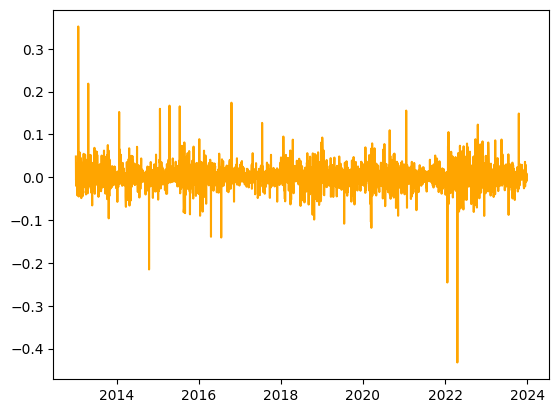

In [40]:
plt.plot(df_NFLX['Date'], df_NFLX['Return'], label='Return', color='orange')

In [42]:
find_d(df_NFLX, 'Return')

Number of difference: 0
ADF Statistic: -35.830437
p-value: 0.000000


Test Statistics much smaller than normal Differencing; However, we pick the appropriate variable based on need

* If forecast price or price analysis, we need to use Price

* If forecast expected return or analyzing volatility, we can use Return

### <a id='toc2_2_2_'></a>[Other methods](#toc0_)

#### <a id='toc2_2_2_1_'></a>[Box-Cox Transform](#toc0_)

- Box-Cox Transform offers a systematic way transform non-normal data into a form that better approximates normality, stabilizes variance and enhances the applicability of methods that rely on normality assumptions. It's particularly used for positively skewed data such as financial metrics, biological measurement or time-to-event data

The Box-Cos transformation is defined as :
$$y(\lambda) =
\begin{cases}
\dfrac{y^{\lambda} - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
\log(y), & \text{if } \lambda = 0
\end{cases}$$

Where: y is the original data-point

$\lambda$ is the transformation param, this is selected by the maximize of log-likelihood function

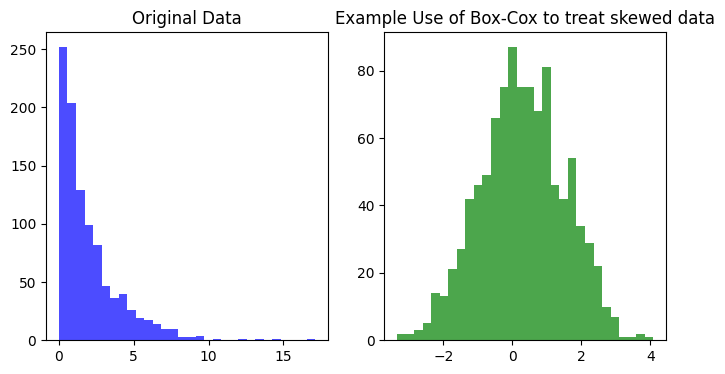

In [53]:
np.random.seed(0)
data = np.random.exponential(scale=2, size=1000)

transformed_data, lambda_opt = stats.boxcox(data)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, color='green', alpha=0.7)
plt.title('Example Use of Box-Cox to treat skewed data')

plt.show()

In [ ]:
df_NFLX['BC_Price'], lambda_opt = stats.boxcox(df_NFLX['Close'])

In [50]:
print(f"Optimal Lambda: {lambda_opt}")

Optimal Lambda: 0.3922703124466972


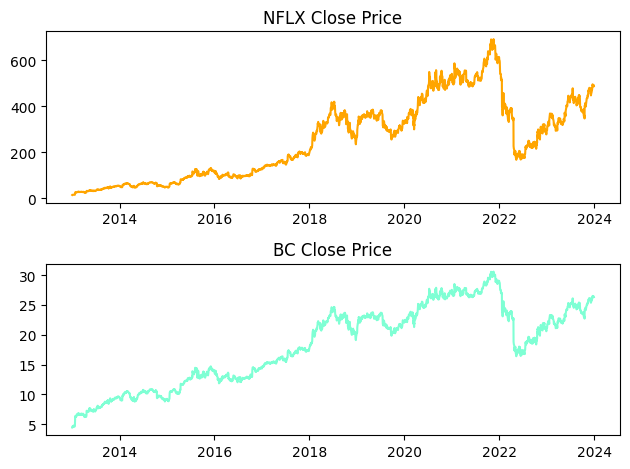

In [49]:
plt.subplot(2,1,1)
plt.plot(df_NFLX['Date'], df_NFLX['Close'], label='Close_Price', color='orange')
plt.title('NFLX Close Price')

plt.subplot(2,1,2)
plt.plot(df_NFLX['Date'], df_NFLX['BC_Price'], label='BC', color='aquamarine')
plt.title('BC Close Price')

plt.tight_layout()

The skewness and variance has been reduced by compressing values down to lower scale. However, we just need to use Box-Cox when the series has a changing variance and highly skewed (e.g volatility grows with price level -> like stocks), otherwise, just use normal differencing.

#### <a id='toc2_2_2_2_'></a>[Yeo/Johnson Transform](#toc0_)

Yeo-Johnson Transform is an extension of Box-Cox Transform, but unlike Box-Cox, it can handle both positive and negative values. This is especially useful in data processing for ML models and require normally distributed or symmetrically distributed data, such as linear regression or PCA.

Y-J Transformation is defined piecewise depending on whether the input value y is non-negative or negative. The transformation T(y; $\lambda$) is defined by:

$$T(y;\lambda) =
\begin{cases}
  \dfrac{(y+1)^{\lambda} - 1}{\lambda}, & \text{if } \lambda \neq 0 \\[1em]
  \log(y+1), & \text{if } \lambda = 0
\end{cases}
\quad \text{for } y \geq 0$$

$$T(y;\lambda) =
\begin{cases}
  -\dfrac{(-y+1)^{2-\lambda} - 1}{2-\lambda}, & \text{if } \lambda \neq 2 \\[1em]
  -\log(-y+1), & \text{if } \lambda = 2
\end{cases}
\quad \text{for } y < 0$$

As an improvement of Box-Cox, the Y-H Transform works for all real-valued inputs. The function is continuous and differentiable w.r.t both y and $\lambda$, the function is reversible via built-in function and the param $\lambda$ can also be utilized by using max-likelihood. USing Y-J can imporve the effectiveness of PCA by ensuring more uniform variances

In [ ]:
y_h_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

df_NFLX['YJ_Price'] = y_h_transformer.fit_transform(df_NFLX[['Close']])

#### <a id='toc2_2_2_3_'></a>[Also try naive Standard Scaling](#toc0_)

In [ ]:
df_NFLX['Standard_Close'] = StandardScaler().fit_transform(df_NFLX[['Close']])

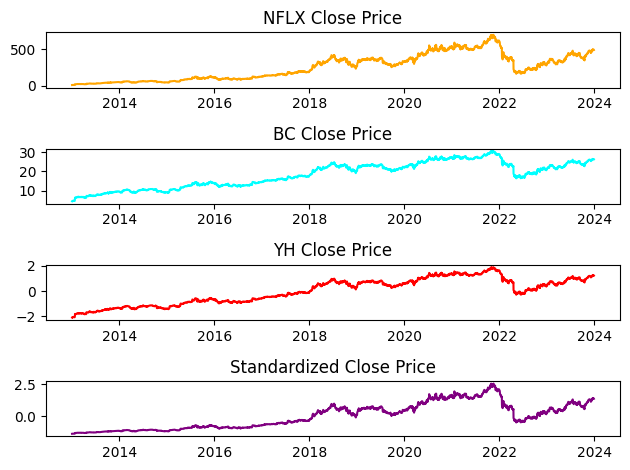

In [67]:
plt.subplot(4,1,1)
plt.plot(df_NFLX['Date'], df_NFLX['Close'], label='Close_Price', color='orange')
plt.title('NFLX Close Price')

plt.subplot(4,1,2)
plt.plot(df_NFLX['Date'], df_NFLX['BC_Price'], label='BC', color='cyan')
plt.title('BC Close Price')

plt.subplot(4,1,3)
plt.plot(df_NFLX['Date'], df_NFLX['YJ_Price'], label='YJ', color='red')
plt.title('YH Close Price')

plt.subplot(4,1,4)
plt.plot(df_NFLX['Date'], df_NFLX['Standard_Close'], label='YH', color='purple')
plt.title('Standardized Close Price')

plt.tight_layout()

Although these look pretty similar, only a mild differences in the scale and respective variance, we have to differentiate for each use case realated to Close Price:

* If use Classical Forecasting (AR-I-MA, ETS) then Box-Cox is usually best due to easy inversion back to actual value

* If use ML or DL models then Yeo-Johnson or Standardize are better, but Y-J still ensures distribution closer to normal


### <a id='toc2_2_3_'></a>[Denoising](#toc0_)

#### <a id='toc2_2_3_1_'></a>[Moving Average (MA) or Smoothing Kernel](#toc0_)

One of the most classical technique is to use Moving Average, which is fitting a moving window to return the mean value over a predefined window range. The wider the moving window, the smoother the series. However, this technique contains several significant backlashes

* Information - Smoothness Tradeoff: Choose a wide moving window smooths out fluctuations, but they also remove significant short-term trends and potential patterns: This is critical in cases where multiple signals can be captured in short term conditions.

* Lag Effect: MA causes the data to deeply depend on past data, the wider the window, the greater the lag, thus losing the current market momentum

* Hard to optimize the window size: Fixed size introduces a risk of not optimally fitting into the series => Risk sacrificing patterns

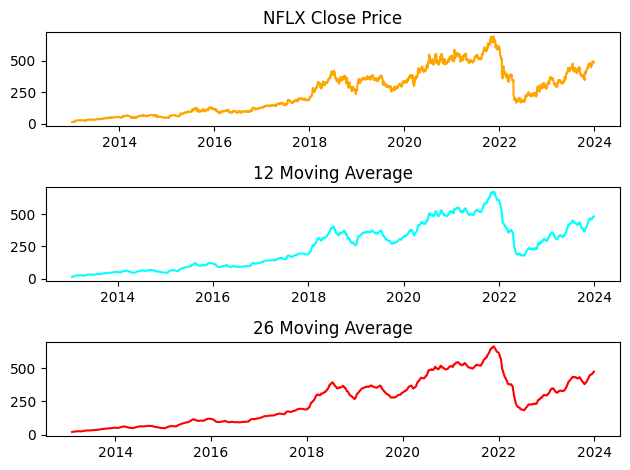

In [74]:
plt.subplot(3,1,1)
plt.plot(df_NFLX['Date'], df_NFLX['Close'], label='Close_Price', color='orange')
plt.title('NFLX Close Price')

plt.subplot(3,1,2)
plt.plot(df_NFLX['Date'], EMA(df_NFLX['Close'], 12), label='BC', color='cyan')
plt.title('12 Moving Average')

plt.subplot(3,1,3)
plt.plot(df_NFLX['Date'], EMA(df_NFLX['Close'], 26), label='BC', color='red')
plt.title('26 Moving Average')

plt.tight_layout()

Another approach is to use a Gaussian smoothing kernel to smooth the data, it works by applying a Gaussian function to each point in the data and weighting its surrounding points, the closer a point is to the current data point, the higher the weight it receives

The Gaussian kernel is also a common smoothing technique in Image processing

The Gaussian function is given by:
$$G(x) = \dfrac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\dfrac{x^2}{2\sigma^2} \right)
$$

where: 
* $\sigma$ is the stddev, this parameter can be modified based on expectation of data points
* x is the distance from the center of the kernel (from the current data point)

The generated weights are based on normal distribution (using mean and stddev)

Gaussian smoothing preserves important patterns like edges and sharp changes better, less sensitivity to outliers and ideal for Gaussian-like data. However, this is still not robust to unexpected patterns in series, especially in high variant data like Stock and works best with Normally-distributed data

C:\Users\admin\AppData\Local\Temp\ipykernel_23428\2195922712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NFLX['Gaussian_smoothed_Price'] = gaussian_filter1d(df_NFLX['Close'], sigma=2)


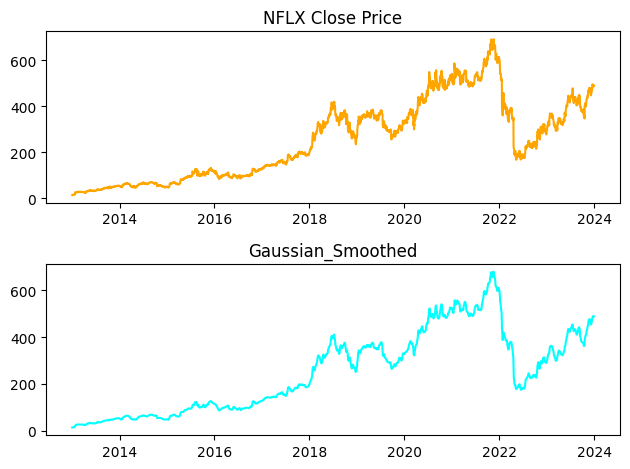

In [76]:
df_NFLX['Gaussian_smoothed_Price'] = gaussian_filter1d(df_NFLX['Close'], sigma=2)

plt.subplot(2,1,1)
plt.plot(df_NFLX['Date'], df_NFLX['Close'], label='Close_Price', color='orange')
plt.title('NFLX Close Price')

plt.subplot(2,1,2)
plt.plot(df_NFLX['Date'], df_NFLX['Gaussian_smoothed_Price'], label='BC', color='cyan')
plt.title('Gaussian_Smoothed')

plt.tight_layout()

#### <a id='toc2_2_3_2_'></a>[Seasonal-Time decomposition with LOESS (STL)](#toc0_)

Additional Approach: Seasonal Decomposition 

Seasonal_Decompose is a function in the statsmodels library which mainly helps with the associated AR-I-MA models. The function decomposes a time series into 3 components:
* Trend: The long term movement in the data, such as gradual increase/ decrease over time, this is regarded as a smoothed version of the series

* Seasonal: The repeating patterns/ cycles in the data that occur at regular intervals (daily, weekly, yearly). If there is seasonal pattern in the data, a clear repeating linear pattern can be observed in the Seasonal component

* Residual: The noise or irregular component that's left after the trend and seasonal components are removed. Ideally this is centered around 0, meaning normality of residuals.

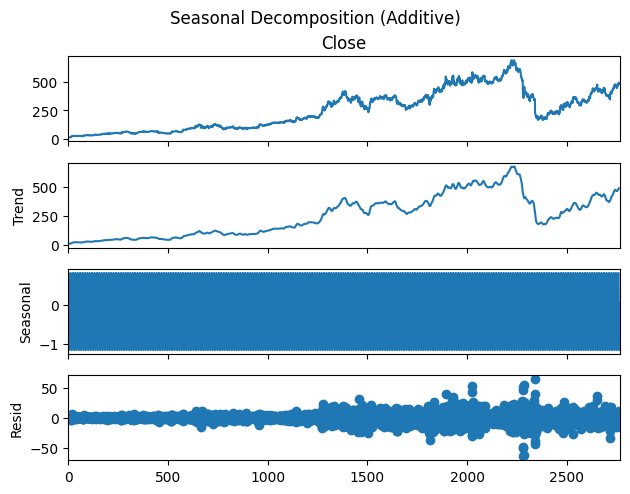

In [78]:
result = seasonal_decompose(df_NFLX['Close'], model='additive', period=12) 

result.plot()
plt.suptitle('Seasonal Decomposition (Additive)', y=1.02)
plt.show()

In this graph, due to lack of seasonal pattern of the data, the Seasonal component is currently full and doesn't show any viewable pattern

The STL utilizes Locally (Weighted) Scatterplot Smoothing (LOESS), which is a non-parametric regression method used for smoothing data. 

LO(W)ESS both work by fitting a local regression models to estimate the value of 1 point based on nearby points, assigning weights to a OLS (or Gaussian kernel) based on their distance from $x_i$.

For example: window_size = 5

$x_2$ can be regressed based on $x_1, x_3, x_4, x_5$ in which $x_1$ and $x_3$ receive higher weight due to being closer to the current point.

The main difference between LOESS and LOWESS is their use of regression kernel.
* LOESS is a general version of local regression and can use different kernel functions and high-degree polynoms for the local fiting (quadratic/ rubic)
* LOWESS is a specific case where a linear kernel (weighted linear regression) is used for the model, this typically uses linear smoothing with less computational complexity.

An improvement of STL over tradtional ST Decomposition is the use of LOESS in the estimation of trend and seasonal components, where a specific local polynomials regression model is fitted to iteratively update the components.

However, some major backlashes of this approach can include the computational complexity (due to using polynomials fitting) and the window size sensitivity, which is also faced in previous approaches

In [ ]:
stl = STL(df_NFLX['Close'], period=12, robust=True) #assuming yearly seasonal pattern

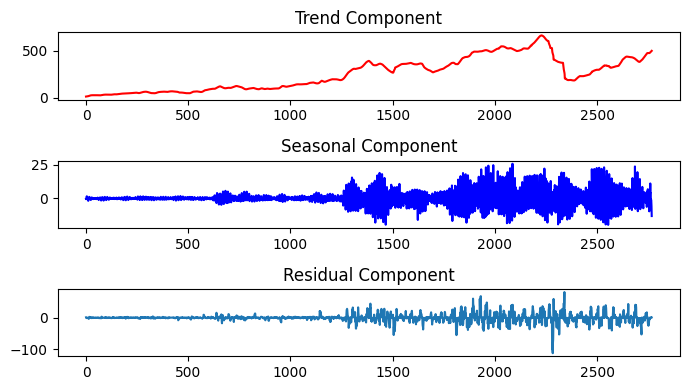

In [96]:
result = stl.fit()

# Plot the decomposition components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 4))

ax1.plot(df.index, result.trend, label='Trend', color='red')
ax1.set_title('Trend Component')
ax2.plot(df.index, result.seasonal, label='Seasonal', color='blue')
ax2.set_title('Seasonal Component')
ax3.plot(df.index, result.resid, label='Residual')
ax3.set_title('Residual Component')
plt.tight_layout()
plt.show()

Due to the use of LOESS, the seasonal component is more remarkable, as compared to the traditional Seasonal Decomposition.

#### <a id='toc2_2_3_3_'></a>[Hodrick-Prescott Filter (HP Filter)](#toc0_)

The Hodrick-Prescott Filter (HP Filter) is a data smoothing technique which works well with low-frequency data (annual, quarterly). The HP filter is commonly applied during analysis to remove short-term fluctuations associated with the business cycle to reveal long-term trends, mostly used in macroeconomics and time series data like GDP, inflation or unemployment.

The HP filter works by decomposing a time series $y_t$ into 2 components:
* Trend component $\hat{y}_t$
* Cyclical Component $c_t$

The goal is to minimize the objective function: 

$$\min_{\hat{y}_t} \sum_{t=1}^{T} \left( y_t - \hat{y}_t \right)^2 + \lambda \sum_{t=2}^{T-1} \left[ \left( \hat{y}_{t+1} - \hat{y}_t \right) - \left( \hat{y}_t - \hat{y}_{t-1} \right) \right]^2$$

Where:

* $y_t$ is the original series at time t
* $\hat{y}_t$ is the trend component at time t
* $c_t = y_t - \hat{y}_t$
* $\lambda$ is the smoothing param that controls the degree of smoothness of the trend. A larger value of $\lambda$ results in a smoother trend, while a smaller value allows for more fluctuations in the trend component. (Typically set to 1600 for quarterly data - suggested by author, 100 for annual data or 6.25 for monthly data)

The objective function has 2 parts:

* First term minimizes the difference between the observed series $y_t$ and the trend $\hat{y}_t$
* Second term penalizes large fluctuations in the trend by adding a penalty for large changes in the trend's slope.

Larger $\lambda$ value result in a smoother trend, but may suppress short-term fluctuations while smaller value allow for more variations and better suited for data with short-term cycles. This marks the main challenge of this approach, which is the choice of parameter

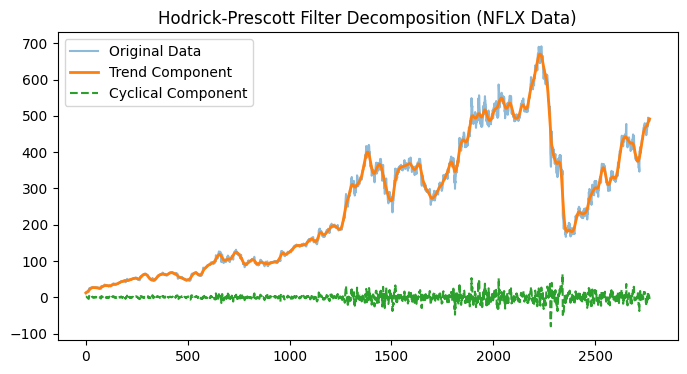

In [11]:
cycle, trend = hpfilter(df_NFLX['Close'], lamb=1600)  # Use the appropriate lambda value based on data frequency

plt.figure(figsize=(8, 4))
plt.plot(df_NFLX.index, df_NFLX['Close'], label='Original Data', alpha=0.5)
plt.plot(df_NFLX.index, trend, label='Trend Component', linewidth=2)
plt.plot(df_NFLX.index, cycle, label='Cyclical Component', linestyle='--')
plt.title('Hodrick-Prescott Filter Decomposition (NFLX Data)')
plt.legend()
plt.show()

#### <a id='toc2_2_3_4_'></a>[Savitzky - Golay Filter (SG Filter)](#toc0_)

##### <a id='toc2_2_3_4_1_'></a>[Pre-requisites: W-S interpolation, the Runge's phenomenon](#toc0_)

* The Whittaker-Shannon interpolation is a method for perfectly reconstructing a continuous-time, band-limited signal from its discret samples using a mathematically defined sinc function:  $$sinc(X) = sin(x)/x$$

A function is band-limited when its Fourier transfrom $F(\omega)$ is 0 outside a finite frequency interval. 

Formally, f(t) is band-limited if $F(\omega) = 0$ for $|\omega| > (\omega)_c$

Where F($\omega$) is he continuous-time Fourier transfrom of f(t)

$\omega_c$ (or $f_c = \omega_c / 2\pi$) is called the bandwidth

Let f(t) be a band-limited function with maximum frequency $f_c$ (Hz)

If we sample f(t) at a sampling frequency $f_s$ that satisfies: $$f_s > 2f_c (Nyquist rate)$$ 

then f(t) cam ne reconstructed from its samples $f(n/f_s)$ by: $$f(t) = \sum_{n=-\infty}^{\infty} f\!\left(\frac{n}{f_s}\right) \, \text{sinc}(f_s t - n),$$

where $$sinc(x) = \frac{\sin(\pi x)}{\pi x}$$

The Fourier transform of a sinc is a rectangular function (ideal low-pass filter) so the sinc acts like the perfect reconstruction filter

* Runge's phenomenon is a problem of oscillation at the edges of an interval that occurs when using polynomial interpolation with polynomials at high degree over a set of equispaced interpolation points.

The main idea of Runge's phenomenon is that going to higher degrees of polynomial interpolation doesn't always improve accuracy, this is similar to Gibbs phenonmenon in Fourier series approximation. Consider the case where one desires to interpolate through n+1 equispaced points of a function f(x) using the n-degree polynomial $P_n (x)$ that passes through those points. We might expect from Weierstrass' theorem that using more points would lead to a more accurate reconstruction of f(X). However, this particular set of polynomial functions $P_n (x)$ is not guaranteed to have the property of uniform convergence but in fact may diverge away from f(x) as n increases.

This typically occurs in an oscillating pattern that magnifies near the ends of the interpolation points.

The Runge's function $$f(x) = \frac{1}{1 + 25x^2}$$

is interpolated at equidistant points $x_i$ between -1 and 1 such that: $$x_i = \frac{2i}{n} - 1, \quad i \in \{0, 1, \dots, n\}$$

with a polynomial $P_n (x)$ of degree < n, the resulting interpolation oscillates towards the end of the interval, i.e close to -1 and 1. The interpolation errors increases (without bound) when the degree of the polynomial is increased: $$\lim_{n\to\infty} \left( \sup_{-1 \le x \le 1} |f(x) - P_n(x)| \right) = \infty.$$ 

This is the consequence of 2 properties:

    - The magnitude of the n-th order derivatives of this particular function grows quickly when n increases.

    - The equidistance between points leads to a Lebesque constant that increases quickly when n increases.

The S-G filter works by fitting a least-square polynomial smoothing filter to each point in the series, along with the neighboring points. Instead of using a fixed window function like Moving Average, the S-G filter fits a low-degree polynom to a subset of data points within a moving window. The central point is replaced by the interpolated value by the polynom. This helps preserve the important features of the data while still smoothing noisy signals.

The degree of the polynom is usually 2 or 3, and the S-G filter can also calculate the derivatives of the data, which can help identify trends, turning/ inflection points in the data. This will help avoid the Runge's method by not fitting too high polynomial degree but still fit the original sequence the best in least-square sense -> the sum squared error is minimized. 

However, major disadvantages of the Savgol filter are still derived from the fixed window size and the use of polynomials, which lead to sensitivity in our choices

In [7]:
df_NFLX['SG_Filtered_Price'] = savgol_filter(df_NFLX['Close'], window_length=5, polyorder=2)

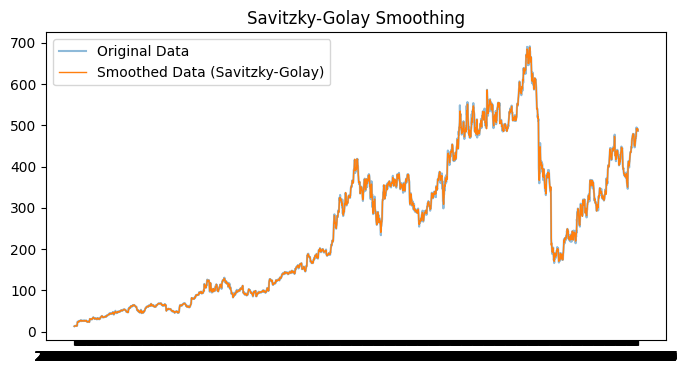

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(df_NFLX['Date'], df_NFLX['Close'], label='Original Data', alpha=0.5)
plt.plot(df_NFLX['Date'], df_NFLX['SG_Filtered_Price'], label='Smoothed Data (Savitzky-Golay)', linewidth=1)
plt.title('Savitzky-Golay Smoothing')
plt.legend()
plt.show()

#### <a id='toc2_2_3_5_'></a>[Kalman Filters](#toc0_)

Kalman Filter is a powerful tool fro estimating and predicting system states in the presence of uncertainty and is widely used as a fundamental component in applications such as target tracking, navigation and control

### <a id='toc2_2_4_'></a>[Different Denoising domain techniques](#toc0_)

#### <a id='toc2_2_4_1_'></a>[Fourier Transform](#toc0_)

Early in the approaches of denoising/ decomposition of time series data was the Fourier transform, which decomposes an oscillatory time series into the sum of several sin/ cosine functions. The Fourier works well with oscillatory series where all patterns repeat after a certain timesteps

The idea of Fourier Transform is that: 

A signal x(t) usually contains: 
* Low/ mid frequency components -> the true underlying signal (smooth, meaningful part)
* High-frequency components -> often noise 

This idea will be again applied by the Wavelet Transform in the next section, which also decomposes a complex signal into a smooth trend and several signal levels, but with a major improvement in the accessibility of where each frequency occurs



##### <a id='toc2_2_4_1_1_'></a>[Pre-requisites: Some similarity between Dot Products and Inner Product](#toc0_)

Assumming there are 2 vectors lying in the space with the same number of dimensions n, (for example 2), which are $a(x_a, y_a)$ and $b(x_b, y_b)$,
the dot product measures their similarity in space $$a.b = \sum_{i=1}^{n}a_i . b_i$$

Similarly, 2 discrete functions f[t] and g[t] have their similarity calculated via inner product

$$f.g = \sum_{i=1}^{n}f(t_i) . g(t_i)$$

and in continuous time domain, the similarity between 2 continuous functions f(t) and g(t) can be similarly measured by taking the integral instead of a sigma sum

$$f(t).g(t) = \int_{-\infty}^{\infty} f(t)g(t)$$

##### <a id='toc2_2_4_1_2_'></a>[A bit about Complex Number](#toc0_)

Imagining unit i ($i = \sqrt-1$) lie in the Vertical axis in a 2-D plane of the number line. Then a complex number can be visualized as having coordinate (a,b) with the actual value $x = a + b.i$

Knowing that multiplying any real number with i means rotating it $90\degree$ to the left

Then we have the complex exponentials: $$e^{i.\theta} = cos\theta + i.sin\theta$$ or  $$e^{-i.\theta} = cos\theta - i.sin\theta$$ 

Which respectively rotates a vector to the left/ right with an angle $\theta$

So the Euler's equation $$e^{i\omega t} = cos(\omega t) + sin(\omega t).i$$

extracts into 2 components with the same frequency $\omega t$: 
* The Real component is a $cos(\omega t)$
* The Complex component is a $sin(\omega t)$

and together, they spin around a circle with the radius of 1 (which is the amplitude of the sinusoidal function)

Also from the formula above we can get a shortcut formula to find the basis: 

$$sin(\omega0 t) = e^{j\omega0 t} - e^{-j\omega0 t}$$
$$cos(\omega0 t) = e^{j\omega0 t} + e^{-j\omega0 t}$$



The oscillatory signal x(t) with overall period $T_0$ can be written as $$x(t) = \sum_{k = -\infty}^{\infty}a_ke^{jk\omega0 t}$$
with $\omega0 = \frac{2\pi}{T_0}$

This is called the synthesis equation for the Fourier series

Multiply both side with $e^{-jn\omega0 t}$, we have
$$x(t)e^{-jn\omega0 t} = \sum_{k = -\infty}^{\infty}a_ke^{jk\omega0 t}e^{-jn\omega0 t}$$

Then we can take the integral in 1 period $T_0$ for both sides to get 

$$\int_{T_0}x(t)e^{-jn\omega0 t}dt = \int_{T_0}\sum_{k = -\infty}^{\infty}a_ke^{jk\omega0 t}e^{-jn\omega0 t}dt$$

$$= \sum_{k = -\infty}^{\infty}a_k\int_{T_0}e^{jk\omega0 t}e^{-jn\omega0 t}dt$$

We can also see that $$\int_{T_0}e^{j(k-n)\omega0 t}dt = T_0$$ if k = n 

And applying Euler's formulas: 

$$\int_{T_0}e^{j(k-n)\omega0 t}dt = \int_{T_0}cos((k-n)\omega0 t)dt + j\int_{T_0}sin((k-n)\omega0 t)dt = 0$$
with k != n

This is due to in the period $T_0$, there are exactly (k-n) periods of the cos and sin function, which when added together repel to 0.

Combining the previous equations we get: $$\int_{T_0}x(t)e^{-jn\omega0 t}dt = T_0a_n$$

and so the Fourier coefficient can be calculated by: $$a_n = \frac{1}{T_0}\int_{T_0}x(t)e^{-jn\omega0 t}dt$$

This is also called the analysis equation

This will again be used to reconstruct the original signal 

$$x(t) = \sum_{k = -\infty}^{\infty}a_ke^{jk\omega0 t}$$

where each term $a_ke^{jk\omega0 t}$ is one decomposition component of the original series. 

This can also be written as

$$x(t) = a_0 + \sum_{n=1}^{\infty} \left[ A_n \cos(n\omega_0 t) + B_n \sin(n\omega_0 t) \right]$$

where

$a_0 = \frac{1}{T_0} \int_{T_0} x(t)dt$ (DC term, the average value),

$A_n = 2 \text{Real}(a_n)$,

$B_n = -2 \text{Imaginary}(a_n)$.

so each decomposition is a sine or cosine wave scaled by the coefficients

##### <a id='toc2_2_4_1_3_'></a>[Deep Intuition of the Formulas](#toc0_)

1. Consider the $e^{jn\omega 0 t}$ as a pure sinusoidal wave (complex form) with real part and imaginary part. When we multiply the original series x(t) to the $e^{-jn\omega 0 t}$, we are tuning in to the n-th sinusoidal frequency in x(t) <=> isolating the particular series at frequency n.
* Taking the average correlation of x(t) with the sinusoid across a full cycle. If x(t) contains that frequency -> the integral is large, else the integral cancels out to zero (orthogonality property), this part helps marking how much of a frequency $n\omega0$ is present in the signal
* Normalizing with $1/T_0$ is just rescaling so that the coefficient $a_n$ is the average contribution of that freq per unit time, not the raw integral.

2. Meaning of $a_n$

    $a_n$ tells the amplitude and phase of the sinusoid at frequency $n\omega0$ that's directly scaled with the sinusoidal components that are added to reconstruct x(t)

    This is essentially connected to how a Spectrum is formed

3. Spectrum

    is a plot of how much energy/ amplitude each frequency contributes to the signal. In Fourier series (period signal), the spectrum is discrete (a set of lines at multiples of the fundamental frequency); however, in Fourier transform (non-periodic signal), the spectrum is continuous

    considering a Fourier coefficient $a_n$ as a complex number

    * Its magnitude $|a_n|$ = strength (amplitude) of the component at frequency $n\omega0$ (Forming Magnitude Spectrum)
    * Its angle arg($a_n$) = phase shift of that component (Forming Phase Spectrum)

    In case when the signal is not period, we replace Fourier series by Fourier transform:
    $$X(\omega) = \int_{-\infty}^{\infty}x(t)e^{-j\omega t}dt$$

    and $X(\omega)$ is the frequency spectrum (continuous)

    $|X(\omega)|$ = amplitude vs frequency and its arg = phase vs frequency

In [ ]:
# Fourier transform into components, notice that the algorithm uses the Fast Fourier Transform (FFT) to reduce the complexity from O($n^2$) to O(NlogN)
fft_vals = np.fft.fft(df_NFLX['Close'])
freqs = np.fft.fftfreq(len(df_NFLX['Close']), 1/500)

# Low-pass filter (cutoff = 30 Hz)
cutoff = 30
fft_filtered = fft_vals.copy()
fft_filtered[np.abs(freqs) > cutoff] = 0

# Inverse FFT
df_NFLX['Fourier_filtered_Price'] = np.fft.ifft(fft_filtered).real #only take the real components

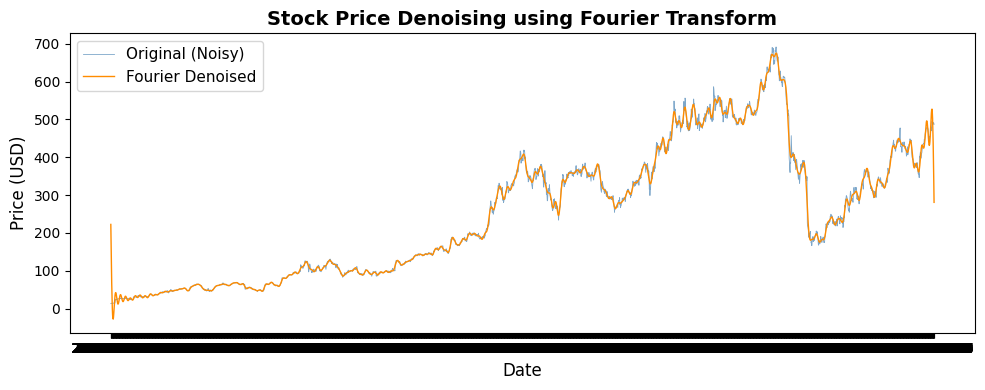

In [19]:
plt.figure(figsize=(10,4))

# Plot noisy signal
plt.plot(df_NFLX['Date'], df_NFLX['Close'], 
         label="Original (Noisy)", 
         linewidth=0.6, color='steelblue', alpha=0.7)

# Plot denoised signal
plt.plot(df_NFLX['Date'], df_NFLX['Fourier_filtered_Price'], 
         label="Fourier Denoised", 
         linewidth=1, color='darkorange')

plt.title("Stock Price Denoising using Fourier Transform", fontsize=14, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend(fontsize=11, loc="best")
plt.tight_layout()
plt.show()

#### <a id='toc2_2_4_2_'></a>[Other Fourier variant: Short-Time Fourier Transform (STFT)](#toc0_)

The major problem with standard Fourier transform lies in the infinite length of the complex component (sine and consine span to infinity), which

* Tells what frequency exist, instead of when they occur
* is good for stationary signals but poor for time-varying signals

So they invented a new variant of the Fourier Transform by chopping the signal into short windows, then apply FT on each:

$$STFT_x(\tau, \omega) = \int_{-\infty}^{\infty} x(t)\, w(t - \tau)\, e^{-i \omega t}\, dt$$

where:
* $w(t-\tau)$ = sliding window center at time $\tau$
* $e^{-i\omega t}$ = Fourier kernel (frequency analysis)

to tell which frequencies exist around time $\tau$

To break down the steps derived from the formula:
1. Take a signal x(t)
2. Multiply it by a window function w($t - \tau$) (like Gaussian or Hamming)
3. Apply FT to that window
4. Slide the window along time to build a time-frequency map (called spectrogram)

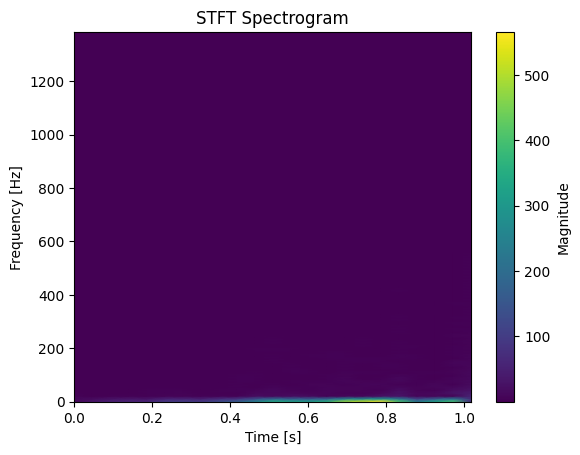

In [22]:
f, t_stft, Zxx = stft(df_NFLX['Close'], fs=len(df_NFLX['Close']), nperseg=256)

# Plot spectrogram
plt.pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud')
plt.title("STFT Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Magnitude")
plt.show()

This is beneficial when keeping both frequency and local time information (unlike Fourier) but one major tradeoff between time resolution and frequency resolution is derived from the fixed window size for all frequencies.

* Narrow window -> good time resolution, poor freq resolution
* Wide window -> good freq resolution, poor time resolution

This is the Heisenberg uncertainty principle in time-frequency analysis.

To solve this, a new kind of Time-Frequency decomposition is invented which improves with multi-resolution tradeoff balancing by applying short window at high freq and long window at low freq, which is the Wavelet transform

#### <a id='toc2_2_4_3_'></a>[Wavelet shrinkage](#toc0_)

Wavelet shrinkage (also called wavelet denoising) is based on the idea that

* A noisy time series can be decomposed into different frequency bands using a wavelet transform
* Noise tend to be spread across high-frequency coefficients
* By shrinking (thresholding) those small coefficients, you can reduce noise while keeping the main signal intact. 

So instead of using moving window for averaging (like MA) or interpolation (like SG) , this method works in the wavelet domain

General steps: 

1. Use a Wavelet Transform to convert the signal into wavelet domain, 
2. Apply a thresholding operation to the wavelet coefficients and 
3. Transform the data back to the original domain

The core idea is that important features of a signal are represented by a large-magnitude wavelet coefficients, while noise is represented by small-magnitude coefficients that are reduced/ removed, leading to a cleaner signal version. 

* Wavelet Decomposition is acquired by applying a Discrete Wavelet Transform (DWT) to the series. This splits the signals into approximation (low-frequency trend) and detail (high-frequency noise) coefficients.

One major improvement of Wavelet Transform over Fourier is the locality of the wavelet fitted into the signal can tell where each frequency exists instead of just showing the overall frequency distribution like Fourier, which uses the infinite sinusoidal series.



##### <a id='toc2_2_4_3_1_'></a>[Pre-requisites: Wavelet and Wavelet Transform](#toc0_)

* A wavelet is a wave-like oscillation with an amplitude that begins at 0, increases/ decreases, then return to 0 one or more times (mean-0 finite). Wavelets are termed a "brief oscillation". Mathematically, a wavelet correlates with a signal if a portion of the signal is similar. 

Wavelets can be used to extract information from many kinds of data, including signals and images; however, set of wavelets are needed to analyze the data fully. 

A wavelet needs to follow certain rules:

1. Zero mean, which means the sum of all the area-under-the-curve is 0
$$\int_{-\infty}^{+\infty} \Psi(t) dt = 0$$

This is called the admissibility condition, mean = 0

2. Finite energy, which means the sum of squared area-under-the-curve < $\infty$ (finite)

$$\int_{-\infty}^{+\infty} |\Psi(t)|^2 dt < \infty$$

=> The function is localized in time

Ex: Morlet wavelet 

 $$\Psi(t) = k_0 \cdot \cos(\omega t) \cdot e^{-t^2/2}$$

Specifically: The Morlet wavelet is a complex exponent that spins around a circle with a constant frequency $\omega_0 t$ and amplitude is the Gaussian Normal Bell Curve

$$\Psi(t) = k.e^{i\omega_0 t}.e^{-\frac{t^2}{2}}$$

* Wavelet transform

Wavelet has 2 specific operations: scaling and translating from the mother wavelet $\Psi(t)$

Scaling: increasing or decreasing the frequency of the wavelet is equal to scaling up or down the signal with an coefficient, here a is called the scale

$$\Psi_a = \Psi(t/a)$$

Translating: moving the wavelet back and forth in time axis by adding/ subtracting the t, here b is called the position

$$\Psi_b = \Psi(t-b)$$

Combining these 2 together, we get the scaled and translated wavelet: 
$$\Psi_{a,b} = \Psi(\frac{t-b}{a})$$

and the value of T(a,b) = the contribution of $\Psi_{a,b}$ to comprising the signal.

The Continuous Wavelet Transform (CWT)

$$T(a,b) = \frac{1}{\sqrt(|a|)}\int_{-\infty}^{+\infty} y(t) \cdot \Psi_{a,b}(t)dt$$

calculates the coefficient that represents how similar the original signal y(t) is to the wavelet $\Psi_{a,b}(t)$ at a particular scale (a) and time position (b). It works by sliding different wavelets along the signal, at each certain interval, the value of the signal is multiplied with the wavelet value and squared for the sum area 

This results in the highest amplitude of the output T(a,b) when the Wavelet has the same frequency with the signal (called Sync) => Used to find which frequency is more prominent at that time point

This is defined in terms of scale a:

* Small scale a -> wavelet compressed -> sensitive to high-frequency component
* Large scale a -> wavelet stretched -> sensitive to low-frequency component

From the T(a,b), we can calculate the scalogram, which is the squared magnitude of the wavelet coefficients: 

$$Scalogram(a,b) = |T(a,b)|^2$$

plotted as a function of time b(x-axis) and scale or frequency (y_axis)

The Scalogram shows where in time certain frequency bands are active.

Global Wavelet Spectrum is also calculated to summarize across all times to see overall frequency content: 

$$P(a) = \int|T(a,b)|^2db$$

##### <a id='toc2_2_4_3_2_'></a>[The Wavelet Transformation in pywt](#toc0_)

uses the Discrete Wavelet Transform, in which we restrict scales and shifts to powers of 2:
$$a = 2^j, b = k.2^j$$

This leads to orthogonal wavelet bases:
$$\psi_{j,k}(t) = 2^{-j/2} \psi(2^{-j}t - k) $$

and the coefficients are inner products:

* Approximation (low freq/ trend): $$cA_j[k] = \langle x(t), \phi_{j,k}(t) \rangle = \sum_n x[n] \phi_{j,k}(n)$$

* Details (high frequency/ noise): $$cD_j[k] = \langle x(t), \psi_{j,k}(t) \rangle = \sum_n x[n] \psi_{j,k}(n)$$

where $\phi$ is the scaling function (low-pass) and $\psi$ is the wavelet function (high-pass)

However, the DWT has a practical computation by using convolution with Filter banks and Mallat algorithms instead of using integrals:

* Low-pass filter h[n] (from scaling function $\phi$): $$cA_{j+1}[k] = \sum_n h[n - 2k] cA_j[n]$$
* High-pass filter g[n] (from wavelet $\psi$): $$cD_{j+1}[k] = \sum_n g[n - 2k] cA_j[n]$$

The Reconstruction of Function from Inverse DWT simply inverts the filter bank: 

$$cA_j[n] = \sum_k \left( h[n - 2k] cA_{j+1}[k] + g[n - 2k] cD_{j+1}[k] \right)$$

This is why we can keep only $cA_J$ and set all cD = 0 to reconstruct, threshold $cD_j$ before reconstructing and compress the series efficiently

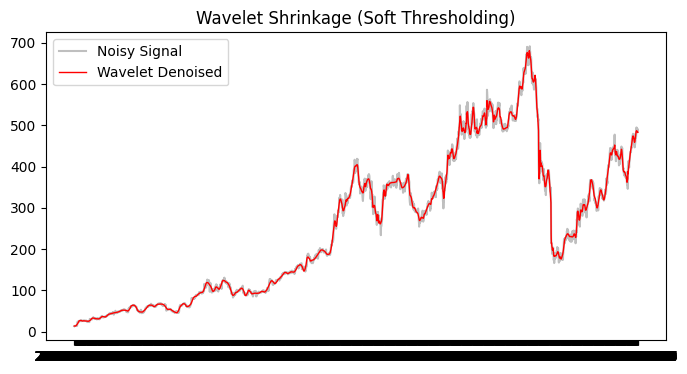

In [4]:
wavelet = "db4" #choose the suitable wavelet. Here is the Daubechies wavelet with 4 vanishing moment - a common choice for smoothing signalls

#Wavelet transform
coeffs = pywt.wavedec(df_NFLX['Close'], wavelet=wavelet, level = 4) # Level shows decomposition depth, more levels = more frequency bands

'''
Setting 4 frequency bands create a 5-dimensional array of coef
- cA4 -> Approximation coef at the highest level (low frequency trend)
- cD4, cD3, cD2, cD1-> Detail coefficients at different levels (high frequency noise, oscillations,...)
'''

#Thresholding
threshold = np.std(coeffs[-1]) * np.sqrt(2*np.log(len(df_NFLX['Close']))) 
''' 
    Universal threshold rule by Donoho-Johnstone by estimating noise level
    from the finest-scale coefficient and set a cutoff for significance 
 '''
 
new_coeffs = [coeffs[0]] + [pywt.threshold(c, threshold, mode="soft") for c in coeffs[1:]]

#Reconstruction
df_NFLX['Wavelet_filtered_Price'] =  pywt.waverec(new_coeffs, wavelet)

# Plot
plt.figure(figsize=(8,4))
plt.plot(df_NFLX['Date'], df_NFLX['Close'], color="gray", alpha=0.5, label="Noisy Signal")
plt.plot(df_NFLX['Date'], df_NFLX['Wavelet_filtered_Price'], "r-", linewidth=1, label="Wavelet Denoised")
plt.title("Wavelet Shrinkage (Soft Thresholding)")
plt.legend()
plt.show()

##### <a id='toc2_2_4_3_3_'></a>[Scalogram](#toc0_)

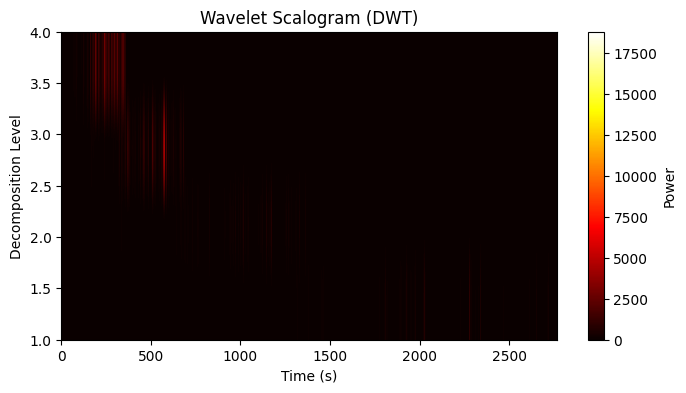

In [9]:
scalogram = []
max_len = max(len(c) for c in coeffs[1:])  # find longest coefficient array
for c in coeffs[1:]:  # skip approximation
    power = np.abs(c)**2
    # pad to same length as max_len
    pad_width = max_len - len(power)
    scalogram.append(np.pad(power, (0, pad_width)))

scalogram = np.array(scalogram)

plt.figure(figsize=(8,4))
plt.imshow(scalogram, aspect='auto', cmap='hot',
           extent=[0, len(df_NFLX['Close']), 1, 4])
plt.colorbar(label='Power')
plt.ylabel("Decomposition Level")
plt.xlabel("Time (s)")
plt.title("Wavelet Scalogram (DWT)")
plt.show()

##### <a id='toc2_2_4_3_4_'></a>[Global Spectrum](#toc0_)

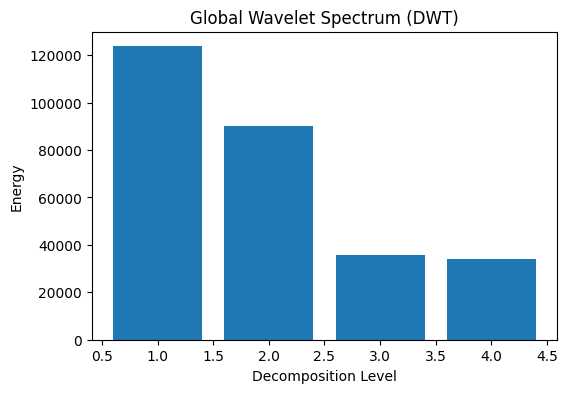

In [10]:
# Global spectrum = total energy per level
global_spectrum = [np.sum(np.abs(c)**2) for c in coeffs[1:]]

plt.figure(figsize=(6,4))
plt.bar(range(1, 4+1), global_spectrum)
plt.xlabel("Decomposition Level")
plt.ylabel("Energy")
plt.title("Global Wavelet Spectrum (DWT)")
plt.show()


Try on synthetic data

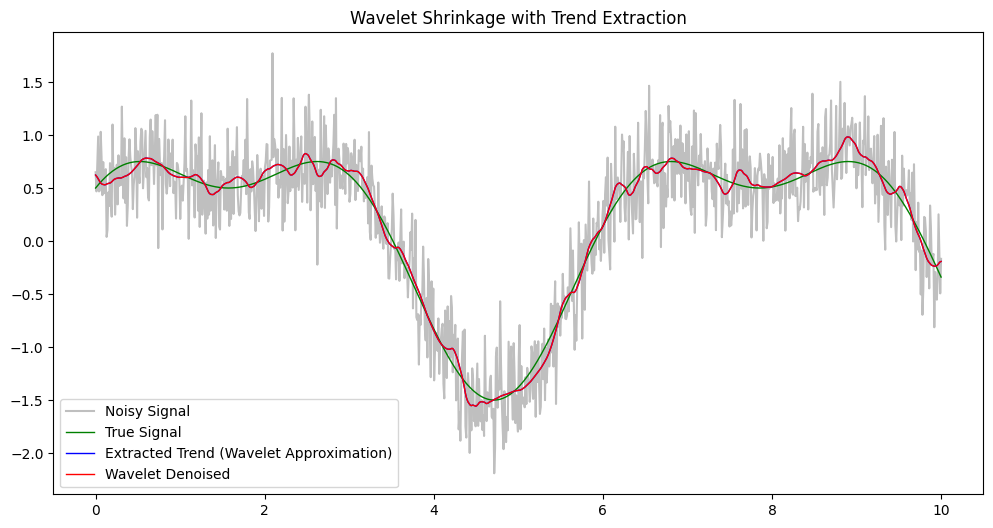

In [29]:
np.random.seed(42)
time = np.linspace(0, 10, 1000)
true_signal = np.sin(time) + 0.5*np.cos(2*time)
observed = true_signal + np.random.normal(0, 0.3, size=len(time))

# 2. Wavelet decomposition
wavelet = "db4"
coeffs = pywt.wavedec(observed, wavelet, level=4)

# Extract trend (approximation at level 4)
trend_coeffs = [coeffs[0]] + [None]*(len(coeffs)-1)   # keep only approximation
trend = pywt.waverec(trend_coeffs, wavelet)

# 3. Threshold selection
threshold = np.std(coeffs[-1]) * np.sqrt(2*np.log(len(observed)))

# 4. Apply soft thresholding for denoising
new_coeffs = [coeffs[0]] + [pywt.threshold(c, threshold, mode="soft") for c in coeffs[1:]]
denoised = pywt.waverec(new_coeffs, wavelet)

trend = trend[:len(time)]
denoised = denoised[:len(time)]
# 5. Plot all
plt.figure(figsize=(12,6))
plt.plot(time, observed, color="gray", alpha=0.5, label="Noisy Signal")
plt.plot(time, true_signal, "g-", linewidth=1, label="True Signal")
plt.plot(time, trend, "b-", linewidth=1, label="Extracted Trend (Wavelet Approximation)")
plt.plot(time, denoised, "r-", linewidth=1, label="Wavelet Denoised")
plt.title("Wavelet Shrinkage with Trend Extraction")
plt.legend()
plt.show()

#### <a id='toc2_2_4_4_'></a>[Hilbert-Huang Transform (HHT)](#toc0_)

The Hilbert Transform introduces a new distinct branch of signal processing with a view to obtaining instantaneous frequency components from an original series, one major advantage of HHT is that the adaptive nature in decomposition, by entirely driven by the data itself instead of using a fixed basis or choosing from a given set like Fourier or Wavelets. 

This adaptive characteristic makes HHT more suitable for non-stationary, non-linear and stochastic data processing.

The Hilbert-Huang Transform consists of 2 mains steps:
* The Empirical Mode Decomposition (EMD) to decompose the original signal into Intrinsic Mode Functions (IMF) and
* The Hilbert Spectral Analysis (HSA) extracts instantaneous frequency data from these IMFs for further analysis.

Since the signal is decomposed in time domain and the length of the IMFs is the same as the original signal, HHT preseres the characteristics of the varying frequency.

##### <a id='toc2_2_4_4_1_'></a>[Pre-requisites: Cubic Spline Interpolation](#toc0_)

is a mathematical method commonly used to construct new points within the boundaries of a set of known points. These new points are function values of an interpolation function (referred to as Spline), which itself consists of multiple cubic piecewise polynomials. 

Cubic spline interpolation is the process of constructing a spline f: $[x_1, x_{n+1} -> R]$ which consists of n polynomials of degree 3, referred to as $f_1$ to $f_n$. A spline is a function defined by piecewise polynomials. Opposed to regression, the interpolation function traverses all n+1 existing points of a dataset D. The resulting function has the following structure

$$f(x) =
\begin{cases}
a_1 x^3 + b_1 x^2 + c_1 x + d_1, \text{if } x \in [x_1, x_2] \\
a_2 x^3 + b_2 x^2 + c_2 x + d_2, \text{if } x \in (x_2, x_3] \\
\ \vdots \\
a_n x^3 + b_n x^2 + c_n x + d_n, \text{if } x \in (x_n, x_{n+1}]
\end{cases}$$

where each polynomial is just valid within a given interval. While extrapolation predicts a development outside the range of the data, interpolation works just within the data boundaries [$x_1, x_{n+1}$]

with properly chosen coefficients $a_i, b_i, c_i, d_i$ for the polynomials, the resulting function traverses the points smoothly.

Every polynomial is known to pass through exactly 2 points, therefore the equations can be written out as 
$$a_1 x_1^3 + b_1 x_1^2 + c_1 x_1 + d_1 = y_1 \\
a_1 x_2^3 + b_1 x_2^2 + c_1 x_2 + d_1 = y_2 \\
a_2 x_2^3 + b_2 x_2^2 + c_2 x_2 + d_2 = y_2 \\
a_2 x_3^3 + b_2 x_3^2 + c_2 x_3 + d_2 = y_3 \\

a_n x_n^3 + b_n x_n^2 + c_n x_n + d_n = y_n \\
a_n x_{n+1}^3 + b_n x_{n+1}^2 + c_n x_{n+1} + d_n = y_{n+1}$$

These express as at x = $x_1$, the value of the first polynomial is equal to $y_1$ and at $x = x_2$, the value is $y_2$. The point where the second polynomial begins ($x = x_2$) is exactly the point where the first polynomial has ended, the second polynomial's value is $y_2$ and so forth. Also the first and second derivatives of all polynomials are identical in the points where they touch their adjacent polynomial

The general formula of a cubic spline at points ($t_i, x_i$) can be written as:

Between $t_i$ and $t_{i+1}$, the spline is $$S_i(t) = a_i + b_i (t - t_i) + c_i (t - t_i)^2 + d_i (t - t_i)^3$$

Coefficients are choisen so that 
* $S_i(t_i) = x_i, S_i(t_{i+1}) = x_{i+1}$ (interpolate points)
* $S'_i(t)$ and $S''_i(t) $ match at junctions(smoothness)
* Some boundary conditions (natural spline: second derivative = 0 at endpoints,.....)


##### <a id='toc2_2_4_4_2_'></a>[The Empirical Mode Decompostion (EMD)](#toc0_)

breaks down signal into various components, this can be compared with other analysis methods such as the Fourier and Wavelet Transform, and also can be utilized for Denoising signal. Using the EMD method, any complicated data set can be decomposed into a finite and often small number of components. These components from a complete and nearly orthogonal basis for the original signal

The steps of EMD can be listed as follows: 

1. Supposing we have a signal x(t)
2. Find all the local maxima/ minima of x(t)
3. Interpolate the local maxima into a fitting line -> upper envelope $e_{upper}(t)$
4. Interpolate the local minima into a fitting line -> lower envelope $e_{lower}(t)$

    Typically cubic spline interpolation is used

5. Compute the mean envelope
    $$m(t) = \frac{e_{upper}(t) + e_{lower}(t)}{2}$$
6. Extract detail (proto-IMF)
    $$h_1(t) = x(t) - m(t)$$

    $h_1(t)$ is a candidate IMF, not not necessarily valid yet
7. Check the IMF conditions

    A valid IMF must satisfy

    * Number of 0 crossings ~ number of extrema (differ by at most 1) <=> S-Number criterion
    * Mean of envelopes is approximately 0 at all times
    * By Cauchy convergence test criterions
        $$SD_k = \sum_{t = 0}^{T}\frac{|h_{k-1}(t) - h_k(t)|^2}{h^2_{k-1}(t)} < threshold$$

        This can be interpreted as Sum of Squared Difference between timesteps/ energy of previous timestep

    If not valid then repeat with $h_1(t)$ (called sifting)

    After k iterations: $$h_{1k}(t) -> c_1(t)$$

    -> The first IMF
8. Remove IMF from the signal 
$$r_1(t) = x(t) - c_1(t)$$


Now $r_1(t)$ is the residual signal

9. Repeat for residual

Apply all steps again with $r_1(t)$ to extract the next IMF $c_2(t)$

10. Continue until the residual $r_n(t)$ is a monotonic function (cannot extract more oscillations)

$$X(t) = \sum_{j = 1}^{n}c_j + r_n$$

As the $1^{st}$ IMF usually carries the most oscillating (high-frequency) components, it can be rejected to remove high-frequency noise (denoising)

Number of IMFs: 8


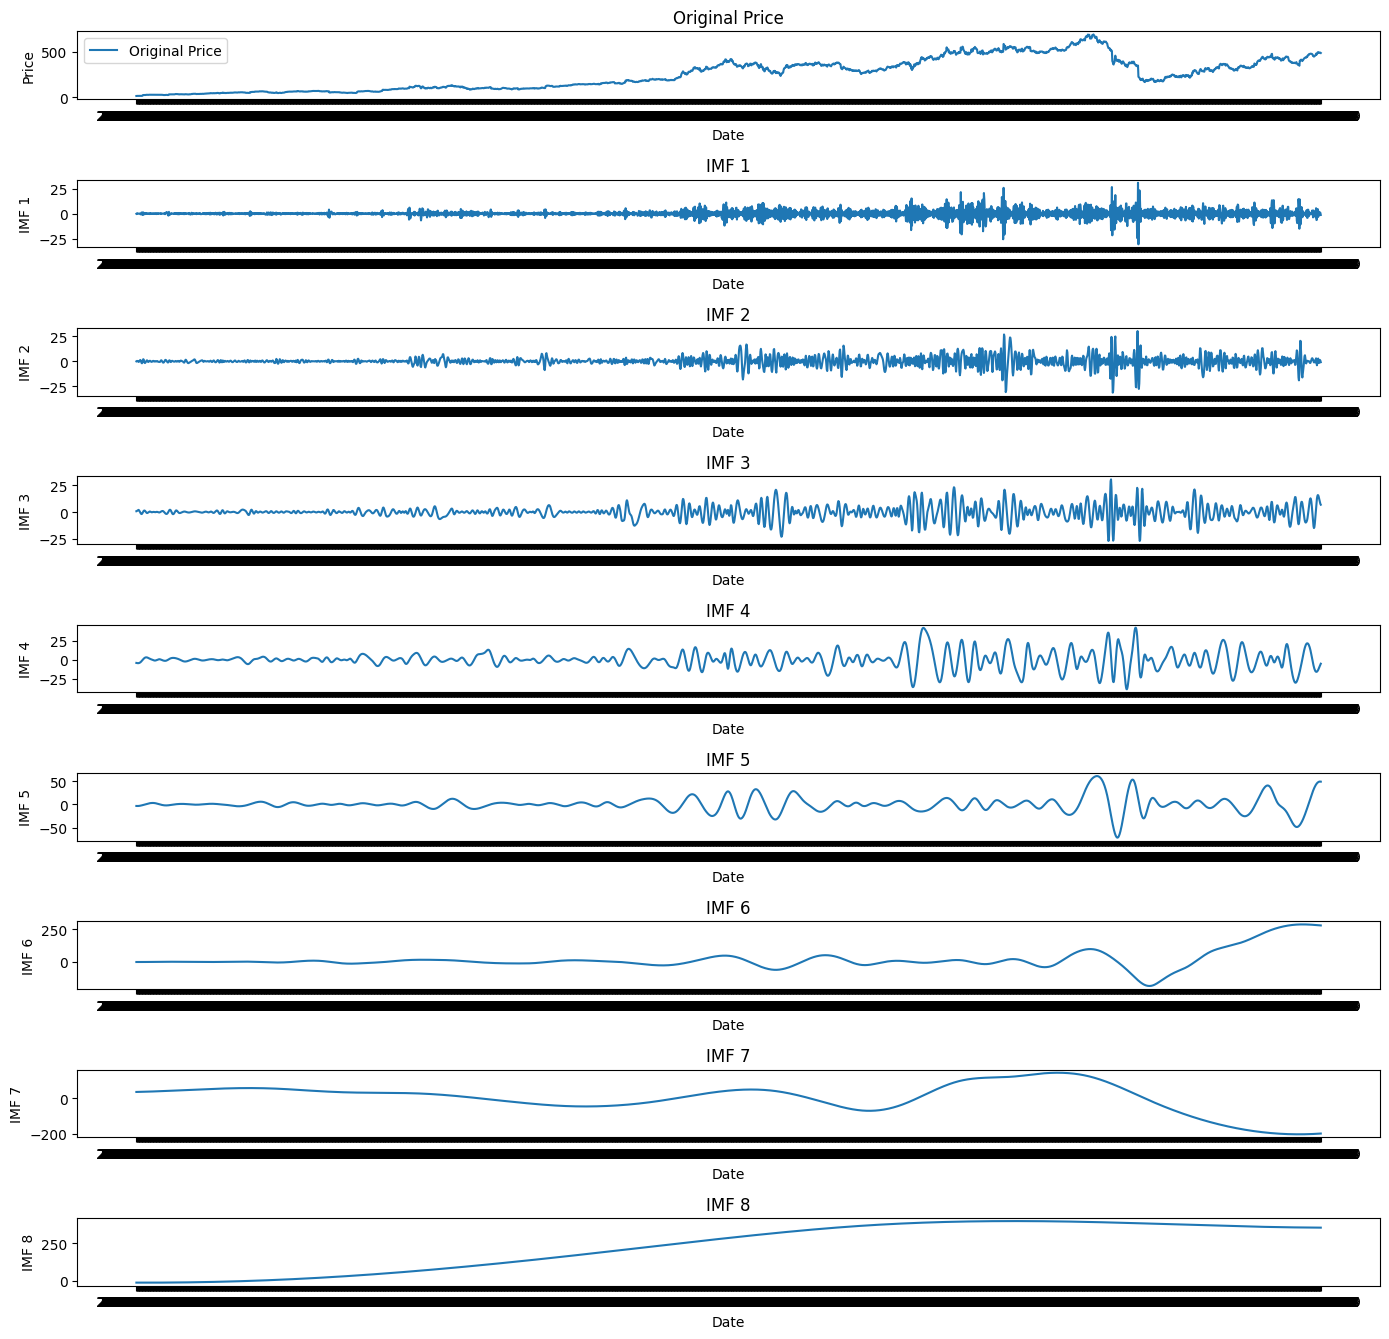

In [13]:
#EMD takes into a np array not a pd.df column
signal = df_NFLX['Close'].values 

emd = EMD()
imfs = emd(signal)

# imfs is a 2D numpy array: shape (num_imfs, signal_length)
print(f"Number of IMFs: {imfs.shape[0]}")


plt.figure(figsize=(14, 1.5*(imfs.shape[0] + 1)))

# Plot original Price
plt.subplot(imfs.shape[0] + 1, 1, 1)
plt.plot(df_NFLX['Date'], df_NFLX['Close'], label='Original Price')
plt.title('Original Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot all IMFs
for i in range(imfs.shape[0]):
    plt.subplot(imfs.shape[0] + 1, 1, i + 2)
    plt.plot(df_NFLX['Date'], imfs[i])
    plt.title(f'IMF {i + 1}')
    plt.xlabel('Date')
    plt.ylabel(f'IMF {i + 1}')

plt.tight_layout()
plt.show()

The Decomposition stops at IMF 8, which is a monotonic signal with no clear extrema

We can stop here with the view to denoising the original signal, the first 2 imfs look like white noise and can be either shrinked down or eliminated and the rest will be added up to get the denoised data

In [25]:
df_NFLX['EMD_filtered_Price'] = np.sum(imfs[2:], axis=0)

#or keep only IMFs above some energy threshold

energies = [np.sum(imf**2) for imf in imfs]
threshold = 0.01 * np.sum(energies)   # e.g., 1% of total energy
keep_indices = [i for i, e in enumerate(energies) if e > threshold]

df_NFLX['EMD_energy_thresholded_Price'] = np.sum(imfs[keep_indices], axis=0)

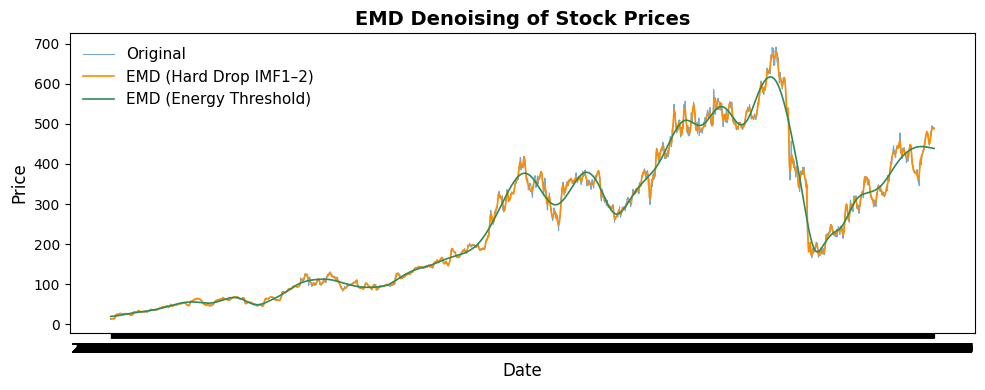

In [19]:
plt.figure(figsize=(10, 4))

# Original
plt.plot(
    df_NFLX['Date'], df_NFLX['Close'],
    linewidth=0.8, color='steelblue', alpha=0.7,
    label='Original'
)

# Hard-drop (remove first 2 IMFs)
plt.plot(
    df_NFLX['Date'], df_NFLX['EMD_filtered_Price'],
    linewidth=1.2, color='darkorange',
    label='EMD (Hard Drop IMF1–2)'
)

# Energy-based thresholding
plt.plot(
    df_NFLX['Date'], df_NFLX['EMD_energy_thresholded_Price'],
    linewidth=1.2, color='seagreen',
    label='EMD (Energy Threshold)'
)

# Title & legend
plt.title("EMD Denoising of Stock Prices", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)

plt.legend(frameon=False, fontsize=11)
plt.tight_layout()
plt.show()

However, denoising is only 1 additional application of HHT in terms of spectral analysis

In [30]:
# df_NFLX.to_csv('D:/Study/Education/Projects/OmniTS/data/temp.csv', index = False)

df_NFLX = pd.read_csv('D:/Study/Education/Projects/OmniTS/data/temp.csv')

#### <a id='toc2_2_4_5_'></a>[Other variants of EMD](#toc0_)

##### <a id='toc2_2_4_5_1_'></a>[EEMD](#toc0_)

##### <a id='toc2_2_4_5_2_'></a>[CEEMD/ CEEMDAN](#toc0_)

##### <a id='toc2_2_4_5_3_'></a>[VMD](#toc0_)

##### <a id='toc2_2_4_5_4_'></a>[MEMD](#toc0_)

##### <a id='toc2_2_4_5_5_'></a>[NA-MEMD](#toc0_)

##### <a id='toc2_2_4_5_6_'></a>[ICEEMDAN](#toc0_)

##### <a id='toc2_2_4_5_7_'></a>[Pre-requisites: Hilbert Transform](#toc0_)

##### <a id='toc2_2_4_5_8_'></a>[Pre-requisites: Cauchy Principle Value](#toc0_)

The Cauchy principle Value is a method for assigning values to certain improper integrals (e.g. unbounded integral) which would otherwise be undefined. In this method, a singularity (the point where the function is invalid) of the integral is avoided by limiting the integral interval to the non-singular domain.

Depending on the type of singularity in the integral f, the Cauchy principle value is defined according the rules: 

* For a singularity at a finite number b

$$\lim_{\varepsilon \to 0^+} \left[ \int_a^{b-\varepsilon} f(x)\,dx \;+\; \int_{b+\varepsilon}^c f(x)\,dx \right]$$

with a < b < c and b is the singularity point

* For a singularity at infinity ($\infty$)

$$\lim_{a \to \infty} \int_{-a}^{a} f(x)\, dx$$

This will ensure that the integral has the valid value instead of being defined as invalid

Having obtained the intricsic mode function components, the instantaneous frequency can be computed using the Hilbert Transform.

The Hilbert Transform is a specific singular integral that takes a function, x(t) of a real variable and produces another function of a real variable H(u)(t). The Hilbert transform can be thought of as the convolution of x(t) with the function $h(t) = 1/\pi t$, known as the Cauchy kernel. Because 1/t is not integrable across t = 0, the integral defining the convolution doesn't always converge. Instead, the Hilbert transform is defined using the Cauchy principle value.

$$H\{x(t)\} = \frac{1}{\pi}P.V.\int_{-\infty}^{\infty}\frac{x(\tau)}{t-\tau}d\tau$$

where P.V is the Cauchy Principle Value of the integral to ensure that even when $\tau = t$, the denominator becomes 0, the singularity will not affect the final result

$$\text{P.V.} \int_{-\infty}^{\infty} \frac{x(\tau)}{t - \tau}\, d\tau
= \lim_{\varepsilon \to 0^+} \left[
\int_{-\infty}^{t-\varepsilon} \frac{x(\tau)}{t - \tau}\, d\tau
+ \int_{t+\varepsilon}^{\infty} \frac{x(\tau)}{t - \tau}\, d\tau
\right]$$

The Hilbert transform is essentially a phase shifter: 

$$X(\omega) \;\xrightarrow{\;\text{Hilbert}\;}\; -j \, \operatorname{sgn}(\omega)\, X(\omega)$$

where: 

* $X(\omega)$ = Fourier transform of x(t)

* sgn($\omega$) = sign function (+1 for positive frequency, -1 for negative frequency)

This means the positive freq components get a -j multiplier (phase shift of $-90\degree$) and the negative freq components get a +j multiplier (phase shift of + $90\degree$)

From this, we can construct the analytic signal:

$$z(t) = x(t) + jH\{x(t)\} = a(t)e^{i\theta (t)}$$

from z(t):

* Instantaneous amplitude: $$A(t) = ||z(t)|| = \sqrt {x^2(t) + H^2\{x(t)\}} $$ => capture the signal's strength changing with time
* Instantaneous phase: $$\theta(t) = arg(z(t)) = arctan(\frac{H\{x(t)\}}{x(t)})$$ => gives the evolving oscillatory phase
* Instantaneous frequency: $$\omega (t) = \frac{1}{2\pi}\frac{d\theta (t)}{dt}$$ => tells the time-localized frequency content

##### <a id='toc2_2_4_5_9_'></a>[Hilbert Spectrum Analysis (HSA)](#toc0_)

The Hilbert Spectrum Analysis is a wide framework, which is a part of Hilbert-Huang Transform, this framework is usually applied after the EMD, the HSA workflow consists of 4 main steps:

* Decompose signal into IMFs (via EMD)

$$x(t) = \sum_{k = 1}^{N}IMF_k(t) + r(t)$$

* Apply Hilbert Transform to each IMF -> analytic signals

$$z_k(t) = IMF_k(t) + jH\{IMF_k(t)\}$$

* Extract instataneous frequency $A_k(t)$ and amplitude $\omega_k(t)$ from each IMF
* Combine them into the Hilbert Spectrum

$$H(\omega, t) = \Re \left\{ \sum_{k=1}^{N} A_k(t) \, e^{j \int \omega_k(t)\, dt} \right\}$$

This spectrum shows how energy ($amplitude^2$) is distributed across time and frequency

Unlike Fourier, which gives a global frequency spectrum or Wavelet, which gives local frequency spectrum only, HSA gives a time-freq-energy representation.

* The Hilbert Spectrum can be defined as: 

$$H(\omega, t) = \sum_{k=1}^{N} A_k^2(t) \, \delta\!\big(\omega - \omega_k(t)\big)$$

which gives time-frequency-energy distribution

* The Hilbert Marginal Spectrum can also be calculated by integrating the Hilbert Spectrum over time

$$h(\omega) = \int H(\omega, t)$$

this shows the total energy contribution from each frequency

In [28]:
#Hilbert Transform

analytic_imfs = hilbert(imfs, axis=1)
amplitude_envelope = np.abs(analytic_imfs)
instantaneous_phase = np.unwrap(np.angle(analytic_imfs))
instantaneous_frequency = np.diff(instantaneous_phase, axis=1) / (2.0*np.pi*np.diff(t)[0])

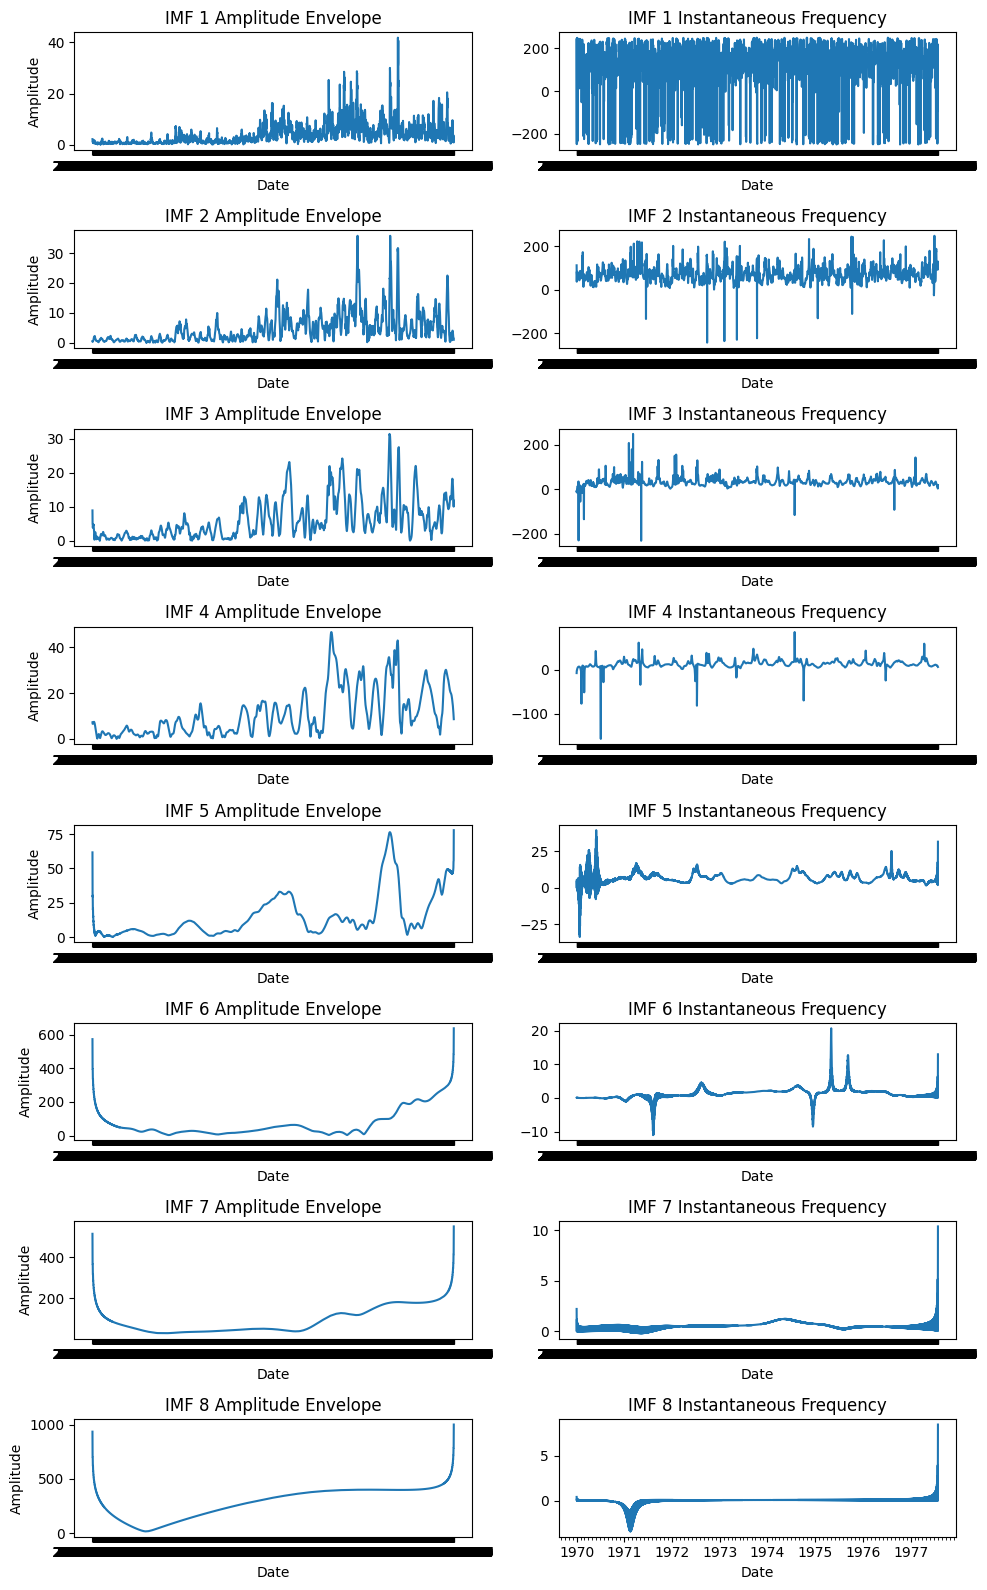

In [40]:
#Instantaneous frequency and instantaneous amplitude
plt.figure(figsize=(10, 2 * imfs.shape[0]))

for i in range(imfs.shape[0]):
    plt.subplot(imfs.shape[0], 2, 2 * i + 1)
    plt.plot(df_NFLX['Date'], amplitude_envelope[i])
    plt.title(f'IMF {i + 1} Amplitude Envelope')
    plt.xlabel('Date')
    plt.ylabel('Amplitude')

    plt.subplot(imfs.shape[0], 2, 2 * i + 2)
    plt.plot(df_NFLX['Date'][1:], instantaneous_frequency[i])
    plt.title(f'IMF {i + 1} Instantaneous Frequency')
    plt.xlabel('Date')
    
# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())         # show every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # format as YYYY
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())        # show months as minor ticks

plt.tight_layout()

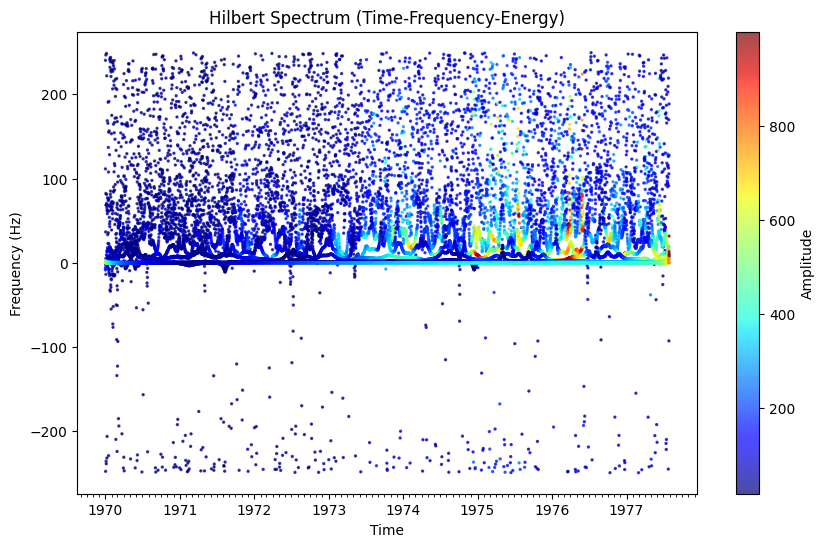

In [41]:
t = df_NFLX['Date'].values

plt.figure(figsize=(10,6))
for i in range(len(imfs)):
    plt.scatter(
        t[1:],                                # length N-1
        instantaneous_frequency[i],           # also length N-1
        c=amplitude_envelope[i,1:],           # length N-1
        cmap='jet', s=2, alpha=0.7
    )
    
# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())         # show every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # format as YYYY
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())        # show months as minor ticks

plt.title("Hilbert Spectrum (Time-Frequency-Energy)")
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Amplitude")
plt.show()

* Frequency: Positive value means forward oscillation, negative values are often artifacts (can be ignored or smoothed)

* Amplitude: More red, stronger

Each dot represents an amplitude contribution at a certain time + frequency

Regions with continuos colored ridges -> strong oscillatory modes in the signal

#### <a id='toc2_2_4_6_'></a>[Sample comprehensive implementation and comparison between methods](#toc0_)

In [ ]:
from src.utils.processing.extract_stock_index import extract_index
from src.utils.processing.denoising import Dimensional_Denoise


df_ABBV = extract_index("ABBV")

dim_denoise = Dimensional_Denoise()
df_ABBV = dim_denoise.apply_all(df_ABBV, 'Close')

df_ABBV.head()

d:\Study\Setup\anaconda\config\Lib\site-packages\statsmodels\tsa\filters\hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


,Open,High,Low,Close,Volume,MA_12,Gaussian_2,Seasonal_Dec,STL,HP,Savgol,Fourier,Wavelet,EMD
0,20.929238,21.216928,20.437773,21.049109,13767900,21.049109,20.839604,NaN,19.951731,20.435674,21.120704,71.058483,20.843707,21.136615
1,20.977191,20.977191,20.473739,20.875303,16739300,21.022369,20.779120,NaN,20.107382,20.542270,20.829793,47.646140,20.897001,20.820368
2,20.749435,20.911260,20.527677,20.611586,21372100,20.959172,20.678687,NaN,20.264538,20.649250,20.606899,28.527737,20.959265,20.553166
3,20.467741,21.246893,20.467741,20.653538,17897100,20.912151,20.571570,NaN,20.423100,20.757205,20.452023,15.624170,21.031141,20.360194
4,20.551652,20.761423,19.994258,20.204029,17863300,20.803209,20.493536,NaN,20.582907,20.866702,20.365163,9.500707,21.107200,20.264088


#### <a id='toc2_2_4_7_'></a>[Additional: How to evaluate the smoothing technique](#toc0_)

To evaluate how well each denoising method smooths the data, we typically compare the smoothed series against the original Close Price by

* Fidelity (how close is it to the original signal)
* Smoothness (noise reduction)

Some metrics can be applied like:

##### <a id='toc2_2_4_7_1_'></a>[Mean Squared Error (MSE)](#toc0_)

Measures how far the smoothed signal deviates from the original => The lower the better

$$MSE = \frac{1}{N}\sum(y_t - \hat{y}_t)^2$$

In [18]:
def eval_mse(df, orig_col="Close"):
    metrics = {}
    df = df.fillna(0)
    for col in df.columns:
        if col != orig_col and not col in ["Open","High","Low","Volume"]:
            metrics[col] = mean_squared_error(df[orig_col], df[col])
    return metrics

metrics = eval_mse(df_ABBV)
metrics

{'MA_12': 3.7243083284701193,
 'Gaussian_2': 0.6481229912464543,
 'Seasonal_Dec': 47.94694805532991,
 'STL': 3.0958397851406083,
 'HP': 2.393775317424449,
 'Savgol': 0.6363529717243332,
 'Fourier': 3.4938671373770953,
 'Wavelet': 1.128207861991596,
 'EMD': 0.919446314989725}

##### <a id='toc2_2_4_7_2_'></a>[Mean Absolute Error (MAE)](#toc0_)

is less sensitive to large deviations than MSE: 

$$MAE = \frac{1}{N}\sum|y_t - \hat{y}_t|$$

In [20]:
def eval_mae(df, orig_col="Close"):
    metrics = {}
    df = df.fillna(0)
    for col in df.columns:
        if col != orig_col and not col in ["Open","High","Low","Volume"]:
            metrics[col] = mean_absolute_error(df[orig_col], df[col])
    return metrics

metrics = eval_mae(df_ABBV)
metrics

{'MA_12': 1.329447928612313,
 'Gaussian_2': 0.5330847954057846,
 'Seasonal_Dec': 1.1670750401957186,
 'STL': 1.0507062823042486,
 'HP': 1.065789970353577,
 'Savgol': 0.5267245393040966,
 'Fourier': 0.7183420960342859,
 'Wavelet': 0.7918834898395203,
 'EMD': 0.6424141986029234}

##### <a id='toc2_2_4_7_3_'></a>[Smoothness Metrics (Variance of the First Difference)](#toc0_)

A smoother signal has smaller variance of consecutive differences

$$Smoothness = Var(Δ\hat{y}_t), Δ \hat{y}_t = \hat{y}_t - \hat{y}_{t-1}$$

In [21]:
def eval_smoothness(df, orig_col="Close"):
    metrics = {}
    for col in df.columns:
        if col != orig_col and not col in ["Open","High","Low","Volume"]:
            metrics[col] = df[col].diff().var()
    return metrics

metrics = eval_smoothness(df_ABBV)
metrics

{'MA_12': 0.12123659620575873,
 'Gaussian_2': 0.204729979775601,
 'Seasonal_Dec': 0.1166234698778934,
 'STL': 0.07587941502342997,
 'HP': 0.06320839316382956,
 'Savgol': 0.33302825340724346,
 'Fourier': 1.177819387730725,
 'Wavelet': 0.203837868751771,
 'EMD': 0.24848644073303358}

##### <a id='toc2_2_4_7_4_'></a>[Signal-to-Noise Ratio (SNR)](#toc0_)

How much variance is explained by the smooth version:

$$SNR = 10.log_{10}(\frac{Var(\hat{y}_t)}{Var(y_t - \hat{y}_t)})$$

In [22]:
def eval_snr(df, orig_col="Close"):
    metrics = {}
    orig = df[orig_col]
    for col in df.columns:
        if col != orig_col and not col in ["Open","High","Low","Volume"]:
            noise = orig - df[col]
            metrics[col] = 10 * np.log10(np.var(df[col]) / np.var(noise))
    return metrics

metrics = eval_snr(df_ABBV)
metrics

{'MA_12': 25.538257599378827,
 'Gaussian_2': 33.09202264466046,
 'Seasonal_Dec': 29.56261900958696,
 'STL': 26.31052165716838,
 'HP': 27.409799013407664,
 'Savgol': 33.17971120676465,
 'Fourier': 25.769400326210206,
 'Wavelet': 30.684289757434705,
 'EMD': 31.570289629199646}

We can see that along the Smoothening techniques: Savgol filter and Gaussian kernel are the most efficient technique which both reduces error but increasing smoothening quality

In [11]:
def eval_smoothness(df, orig_col="Close"):
    metrics = {}
    for col in df.columns:
        if col != orig_col and not col in ["Open","High","Low","Volume"]:
            metrics[col] = df[col].diff().var()
    return metrics
metrics = eval_smoothness(df_ABBV)
metrics

{'MA_12': 0.12123659620575873,
 'Gaussian_2': 0.204729979775601,
 'Seasonal_Dec': 0.1166234698778934,
 'STL': 0.07587941502342997,
 'HP': 0.06320839316382956,
 'Savgol': 0.33302825340724346,
 'Fourier': 1.177819387730725,
 'Wavelet': 0.203837868751771,
 'EMD': 0.24848644073303358}

### <a id='toc2_2_5_'></a>[Dealing with Nulls and Missing data](#toc0_)

#### <a id='toc2_2_5_1_'></a>[Forward/ Back fills => LOCF/ NOCB](#toc0_)

Forwardfills and backfills are the very first existed and simpliest algorithms in Time Series Analysis. The algorithm imputes Null data simply by taking the last/ next value to fit in the missing value. 

* The Forward fills look at the previous past data and
* The Back fills looks at the next future data

This is useful when there is relevant information lying in the past/ future data which can be used to explain missing data and also for the simplicity/ low computational cost of the algorithm. 

However, this is too out-of-date and bias introducing when hallucinating data just based on neighboring data points instead of the whole data movement and frequency

A new improved version of these 2 methods have also been introduced with a more strict rule of imputing, they are the Last Observation Carried Forward (LOCF) and Next Observation Carried Backward (NOCB)

* LOCF is a smarter forward fill where each missing is replaced with the last valid observation before it, but typically bounded so it doesn't fill beyond the last know data point -> avoiding leakage past the data end

* Similarly, NOCB enhances from backward fill to fill data upto a certain boundary to prevent data leakage, this boundary is usually the last value in the series 

LOCF and NOCB are more widely used in fields like finance, medicine and economics, while LOCF is actually used more due to the assumption of continuity, withouth any other changes

In [ ]:
dates = pd.date_range("2023-01-01", periods=10, freq="D")
values = [np.nan, 1, np.nan, 4, 5, np.nan, 7, np.nan, 10, np.nan]
ts = pd.DataFrame({"Date": dates, "Close": values})

ts['LOCF'] = ts['Close'].ffill()
ts['NOCB'] = ts['Close'].bfill()
ts

,Date,Close,LOCF,NOCB
0,2023-01-01,NaN,NaN,1.0
1,2023-01-02,1.0,1.0,1.0
2,2023-01-03,NaN,1.0,4.0
3,2023-01-04,4.0,4.0,4.0
4,2023-01-05,5.0,5.0,5.0
5,2023-01-06,NaN,5.0,7.0
6,2023-01-07,7.0,7.0,7.0
7,2023-01-08,NaN,7.0,10.0
8,2023-01-09,10.0,10.0,10.0
9,2023-01-10,NaN,10.0,NaN


Notice the boundary of each method is not imputed

#### <a id='toc2_2_5_2_'></a>[Interpolation](#toc0_)

We have talked about one variant of Interpolation above naming Cubic Spline Interpolation, mainly used by the Envelope construction during Empirical Mode Decomposition. In general, Interpolation is the process of estimating mising values between known data points by trying to follow the underlying trend/ curve $f(x_i)$ in the data

Some main types of Interpolation include

1. Linear Interpolation:

connects 2 known points with a straight line, assuming linear change

$$y = y_0 + \frac{y_1 - y_0}{x_1 - x_0}(x-x_0)$$

2. Polynomial Interpolation: 

uses a single polynomial passing through all points, instead of just 1 line like above. This can capture nonlinear oscillating trend, but high-order polynomials can often oscillate uncontrollably (Runge's phenomenon)

3. Spline Interpolation:

breaks the series into smaller intervals and fits low-degree polynomials (often cubic) between pairs. This ensures the smoothness at the boundaries (which helps avoiding the Runge's phenomenon) and is very popular for curve smoothing.

4. Nearest Neighbor

is a special type of Interpolation which utilizes the algorithms of KNN to impute data based on nearest known point's value, this is a neighboring relative approach and may not work well with sequential data

5. Piecewise Methods

contains Step-wise constant (like LOCF and NOCB) and Piecewise Linear (which draws a line to connect each consecutive points together)

6. Some other advanced methods

like Fourier Interpolation (assuming periodicity), Kriging (geostatistics, considers spatial correlation) or Barycentric/ Lagrange interpolation (numerically stable forms of polynomial interpolation)

* Note that while Interpolation uses the existing data points to fill the missing data within the range, Extrapolation uses the existing data points to predict the value out of the range, this is also called Forecasting

### <a id='toc2_2_6_'></a>[Outlier Detection](#toc0_)

#### <a id='toc2_2_6_1_'></a>[Hampel filter](#toc0_)



#### <a id='toc2_2_6_2_'></a>[Winsorization](#toc0_)

#### <a id='toc2_2_6_3_'></a>[Z-score/ Modified Z-Score](#toc0_)

#### <a id='toc2_2_6_4_'></a>[Grubbs' test](#toc0_)

#### <a id='toc2_2_6_5_'></a>[Dixon's Q test](#toc0_)

#### <a id='toc2_2_6_6_'></a>[Boxplot/ Tukey's fences](#toc0_)

#### <a id='toc2_2_6_7_'></a>[Cumulative Sum Control Chart (CUSUM)](#toc0_)

#### <a id='toc2_2_6_8_'></a>[Singular Spectrum Analysis (SSA) outlier detection](#toc0_)

#### <a id='toc2_2_6_9_'></a>[Change Point Detection](#toc0_)

##### <a id='toc2_2_6_9_1_'></a>[Bayesian Change Point Detection](#toc0_)

##### <a id='toc2_2_6_9_2_'></a>[Pruned Exact Linear Time (PELT)](#toc0_)

##### <a id='toc2_2_6_9_3_'></a>[Kernel Change Point algorithm](#toc0_)

##### <a id='toc2_2_6_9_4_'></a>[Dynamic Programming CPD](#toc0_)